# **🔰Business Case: DonorsChoose.org Application Screening**

# 🧭 **1: Problem Framing & Goal Definition**

### ✅ **1.1 Business Context**
DonorsChoose.org is a platform where teachers post classroom project requests, and donors choose which ones to fund. The organization wants to **predict whether a project will be approved**, based on the proposal details.

This helps:
- Speed up internal review processes
- Prioritize high-impact proposals
- Reduce manual effort

### 🎯 **1.2 Objective Statement**
> Build a predictive model to classify whether a submitted project proposal will be approved or not, using structured and unstructured features from the dataset.


### 📌 **1.3 Target Variable**
- **`project_is_approved`**: Binary classification  
  - `1` → Approved  
  - `0` → Not approved



### ⚖️ **1.4 Success Metrics**
Since the data is **imbalanced**, we need metrics that reflect performance on both classes:

| Metric | Why It Matters |
|--------|----------------|
| **AUC-ROC** | Measures overall separability between classes |
| **Precision** | How many predicted approvals were correct |
| **Recall** | How many actual approvals were captured |
| **F1-Score** | Balance between precision and recall |
| **PR-AUC** | Especially useful for imbalanced datasets |


### 📂 **1.5 Dataset**

The dataset (`train_data.csv`) contains detailed information about project proposals, including teacher profiles, school details, project descriptions, and approval status.

A secondary dataset (`resources.csv`) provides information about the resources requested in each project.


### 🗃️ **1.6 Features of the Dataset**

**train.csv** includes:

| Feature | Description |
|--------|-------------|
| id | Unique ID of the project proposal |
| teacher_id | ID of the teacher submitting the proposal |
| teacher_prefix | Title of the teacher (e.g., Ms., Mr.) |
| school_state | U.S. state where the school is located |
| project_submitted_datetime | Timestamp of when the project was submitted |
| project_grade_category | Grade level category (e.g., Grades 3-5) |
| project_subject_categories | Broad subject category (e.g., Math & Science) |
| project_subject_subcategories | Specific subject sub-category (e.g., Geometry) |
| project_title | Title of the project |
| project_essay_1 to 4 | Essays describing the project’s purpose, need, and impact |
| project_resource_summary | Summary of resources needed |
| teacher_number_of_previously_posted_projects | Count of prior proposals submitted by the teacher |
| project_is_approved | Target variable: 1 if approved, 0 if rejected |

**Resources.csv** includes:

| Feature | Description |
|--------|-------------|
| id | Resource ID (linked to project ID) |
| description | Description of the requested item |
| price | Unit price of the item |
| quantity | Quantity requested |




# 🧼 **2: Data Understanding & Cleaning**





### 📥 **2.1: Load & Inspect the Data**

### **📚 Import Necessary Libraries:**

In [2]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Text processing
import re
import string

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Natural Language Processing
from sklearn.feature_extraction.text import TfidfVectorizer

# Warnings
import warnings
warnings.filterwarnings('ignore')

### **📂 Loading the Dataset:**

In [ ]:
# Download the training and resources data using gdown
# !pip install gdown
!gdown 1yt-UZORQSySSHGFaLYE-T1Ow7Khz6oyV -O train_data.csv -q
!gdown 1UBjQ871s5PSRrbhc5MpqThBqZ4dcwlkD -O resources.csv -q

In [200]:
# Load the main dataset
projects_df = pd.read_csv('train_data.csv')

# Load the resources dataset
resources_df = pd.read_csv('resources.csv')

# Display the first few rows of the DataFrame
projects_df.head()

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Literacy & Language,"ESL, Literacy",Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,"History & Civics, Health & Sports","Civics & Government, Team Sports",Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1
2,21895,p182444,3465aaf82da834c0582ebd0ef8040ca0,Ms.,AZ,2016-08-31 12:03:56,Grades 6-8,Health & Sports,"Health & Wellness, Team Sports",Soccer Equipment for AWESOME Middle School Stu...,"\r\n\""True champions aren't always the ones th...",The students on the campus come to school know...,NaN,NaN,"My students need shine guards, athletic socks,...",1,0
3,45,p246581,f3cb9bffbba169bef1a77b243e620b60,Mrs.,KY,2016-10-06 21:16:17,Grades PreK-2,"Literacy & Language, Math & Science","Literacy, Mathematics",Techie Kindergarteners,I work at a unique school filled with both ESL...,My students live in high poverty conditions wi...,NaN,NaN,My students need to engage in Reading and Math...,4,1
4,172407,p104768,be1f7507a41f8479dc06f047086a39ec,Mrs.,TX,2016-07-11 01:10:09,Grades PreK-2,Math & Science,Mathematics,Interactive Math Tools,Our second grade classroom next year will be m...,"For many students, math is a subject that does...",NaN,NaN,My students need hands on practice in mathemat...,1,1


Droping the "Unnamed: 0" column: This column appears to be an unnecessary index.

In [201]:
projects_df = projects_df.drop('Unnamed: 0', axis=1)

In [5]:
# Display the first few rows of the DataFrame
resources_df.head()

,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95
2,p069063,Cory Stories: A Kid's Book About Living With Adhd,1,8.45
3,p069063,"Dixon Ticonderoga Wood-Cased #2 HB Pencils, Bo...",2,13.59
4,p069063,EDUCATIONAL INSIGHTS FLUORESCENT LIGHT FILTERS...,3,24.95


In [6]:
# The number of rows and columns given in the dataset
print(f"projects_df: {projects_df.shape[0]} rows x {projects_df.shape[1]} columns")
print(f"resources_df: {resources_df.shape[0]} rows x {resources_df.shape[1]} columns")

projects_df: 109248 rows x 16 columns
resources_df: 1541272 rows x 4 columns


### 📦 **2.2: Data Type Fixes**

In [7]:
projects_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109248 entries, 0 to 109247
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype 
---  ------                                        --------------   ----- 
 0   id                                            109248 non-null  object
 1   teacher_id                                    109248 non-null  object
 2   teacher_prefix                                109245 non-null  object
 3   school_state                                  109248 non-null  object
 4   project_submitted_datetime                    109248 non-null  object
 5   project_grade_category                        109248 non-null  object
 6   project_subject_categories                    109248 non-null  object
 7   project_subject_subcategories                 109248 non-null  object
 8   project_title                                 109248 non-null  object
 9   project_essay_1                               109248 non-nu

A couple of dtype tweaks would make your pipeline cleaner and more efficient—especially for feature engineering and modeling.


| Column                        | Current Dtype | Suggested Dtype | Reason |
|------------------------------|---------------|------------------|--------|
| `project_submitted_datetime` | `object`      | `datetime64`     | Enables extraction of time-based features (month, weekday, hour, etc.) |
| `teacher_prefix`             | `object`      | `category`       | Limited set of values (e.g., Mr., Mrs., Ms.)—saves memory and speeds up processing |
| `school_state`               | `object`      | `category`       | Fixed set of US state codes—ideal for categorical encoding |
| `project_grade_category`     | `object`      | `category`       | Small set of grade levels—useful for one-hot or label encoding |
| `project_subject_categories` | `object`      | `category`       | Often repeated values—categorical encoding helps |
| `project_subject_subcategories` | `object`   | `category`       | Same logic as above |



In [202]:
# Convert datetime column
projects_df['project_submitted_datetime'] = pd.to_datetime(projects_df['project_submitted_datetime'], errors='coerce')

# Convert categorical columns
categorical_cols = [
    'id',
    'project_is_approved',
    'teacher_prefix',
    'school_state',
    'project_grade_category',
    'project_subject_categories',
    'project_subject_subcategories'
]
projects_df[categorical_cols] = projects_df[categorical_cols].astype('category')

In [9]:
resources_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1541272 entries, 0 to 1541271
Data columns (total 4 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   id           1541272 non-null  object 
 1   description  1540980 non-null  object 
 2   quantity     1541272 non-null  int64  
 3   price        1541272 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 47.0+ MB


Optimize the dtypes for memory and clarity:

| Column      | Current Dtype | Suggested Dtype | Reason |
|-------------|----------------|------------------|--------|
| `quantity`  | `int64`        | Consider `int32` | If values are small (e.g., < 2 billion), downcasting saves memory |
| `price`     | `float64`      | Consider `float32` | If precision isn't critical, downcasting reduces footprint |




In [203]:
# Downcast numeric types
resources_df['quantity'] = pd.to_numeric(resources_df['quantity'], downcast='integer')
resources_df['price'] = pd.to_numeric(resources_df['price'], downcast='float')
resources_df['id'] =  resources_df['id'].astype('category')

### 🧯 **2.3: Missing Value Analysis**

In [204]:
def missing_percentage(df):
    total = df.isnull().sum().sort_values(ascending = False)
    total = total[total > 0]
    percent = (total/len(df)) * 100
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

In [205]:
missing_percentage(projects_df)

,Total,Percent
project_essay_4,105490,96.560120
project_essay_3,105490,96.560120
teacher_prefix,3,0.002746


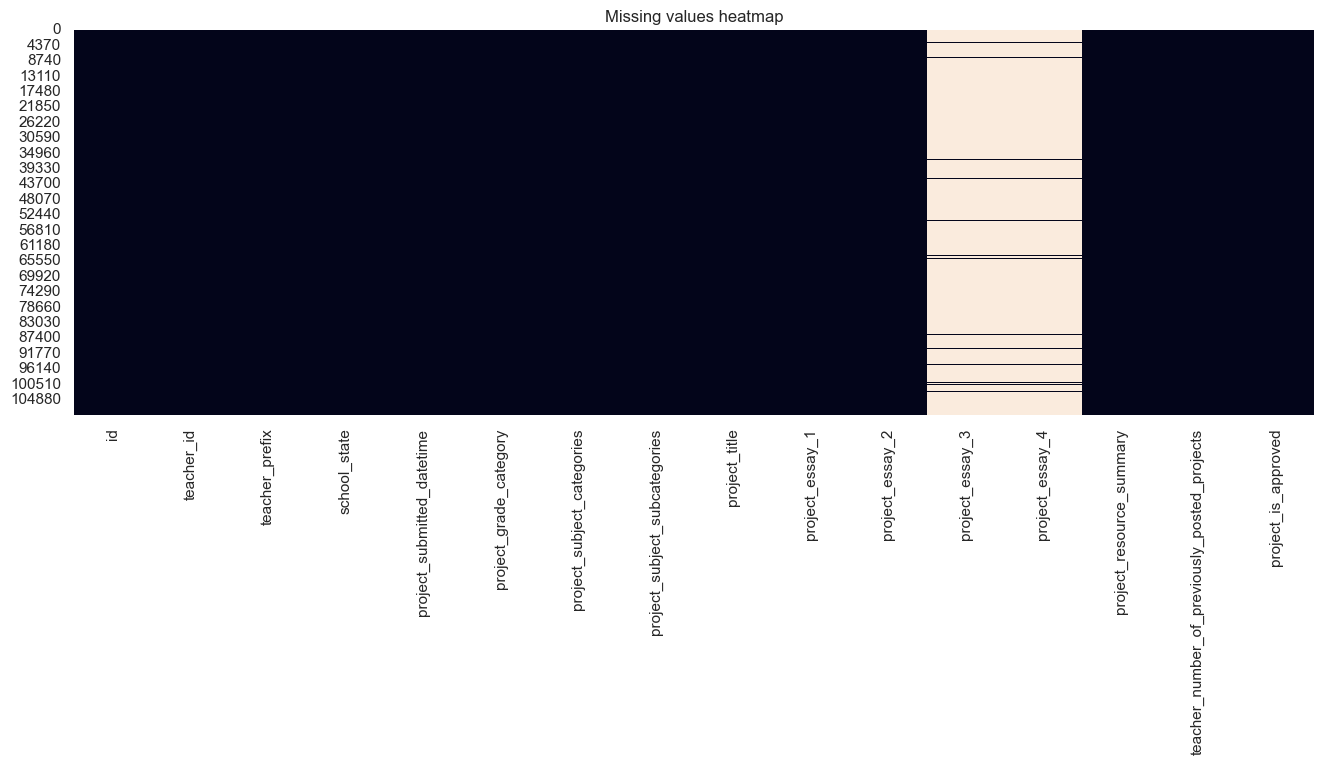

In [206]:
plt.figure(figsize=(16, 5))              
sns.heatmap(projects_df.isnull(), cbar=False)
plt.title('Missing values heatmap')
plt.show()

In [14]:
missing_percentage(resources_df)

,Total,Percent
description,292,0.018945


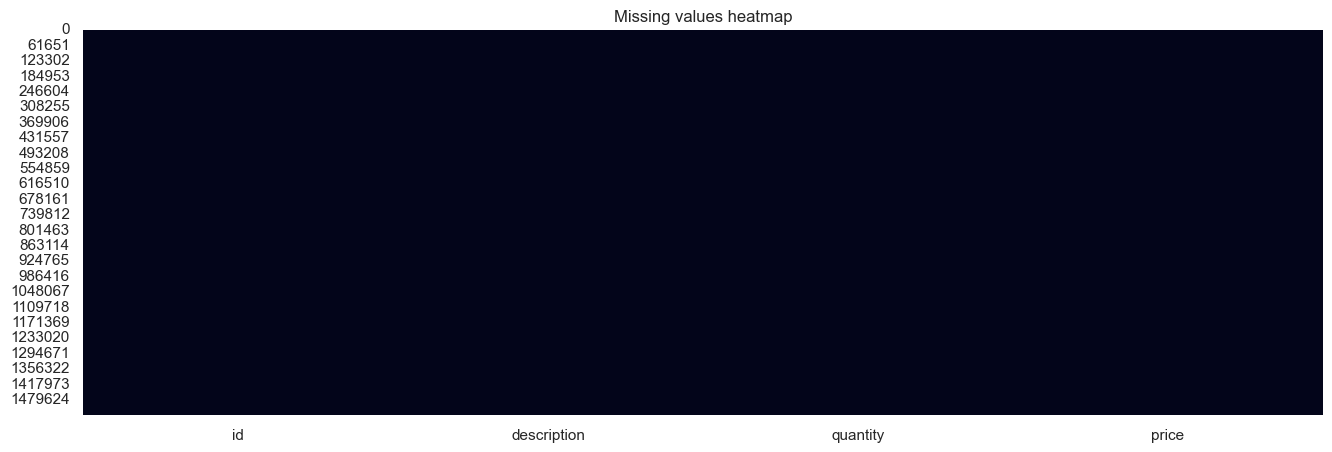

In [207]:
plt.figure(figsize=(16, 5))              
sns.heatmap(resources_df.isnull(), cbar=False)
plt.title('Missing values heatmap')
plt.show()

### 🔧 **Missing Value Summary**

After analyzing missing data in `projects_df` and `resources_df`, the following strategies will help imputes those missing values:

1. **`project_essay_3` & `project_essay_4`** (96% missing):  
   *Filled with empty strings (`''`) since these optional text fields were often left blank. This preserves structure for future NLP tasks without introducing `NaN`s.*

2. **`description` in `resources_df`** (292 missing):  
   *Filled with `'No Description'` to clearly indicate absence while maintaining text consistency.*

3. **`teacher_prefix` in `projects_df`** (3 missing):  
   *Filled with the mode value to retain categorical distribution with minimal distortion.*

These targeted imputations ensure data integrity and readiness for downstream analysis and modeling.

In [208]:
# Fill missing values in project_essay_3 and project_essay_4 with an empty string
projects_df['project_essay_3'].fillna('', inplace=True)
projects_df['project_essay_4'].fillna('', inplace=True)

# Fill missing values in the description column of resources_df with 'No Description'
resources_df['description'].fillna('No Description', inplace=True)

# Fill missing values in the teacher_prefix column of projects_df with the mode
projects_df['teacher_prefix'].fillna(projects_df['teacher_prefix'].mode()[0], inplace=True)

# Verify that there are no remaining missing values in the imputed columns
print("Missing values in projects_df after imputation:")
print(projects_df[['project_essay_3', 'project_essay_4', 'teacher_prefix']].isnull().sum())

print("\nMissing values in resources_df after imputation:")
print(resources_df[['description']].isnull().sum())

Missing values in projects_df after imputation:
project_essay_3    0
project_essay_4    0
teacher_prefix     0
dtype: int64

Missing values in resources_df after imputation:
description    0
dtype: int64


# **📊 3: Univariate Analysis**

### **3.1  Project Approval Rates:**

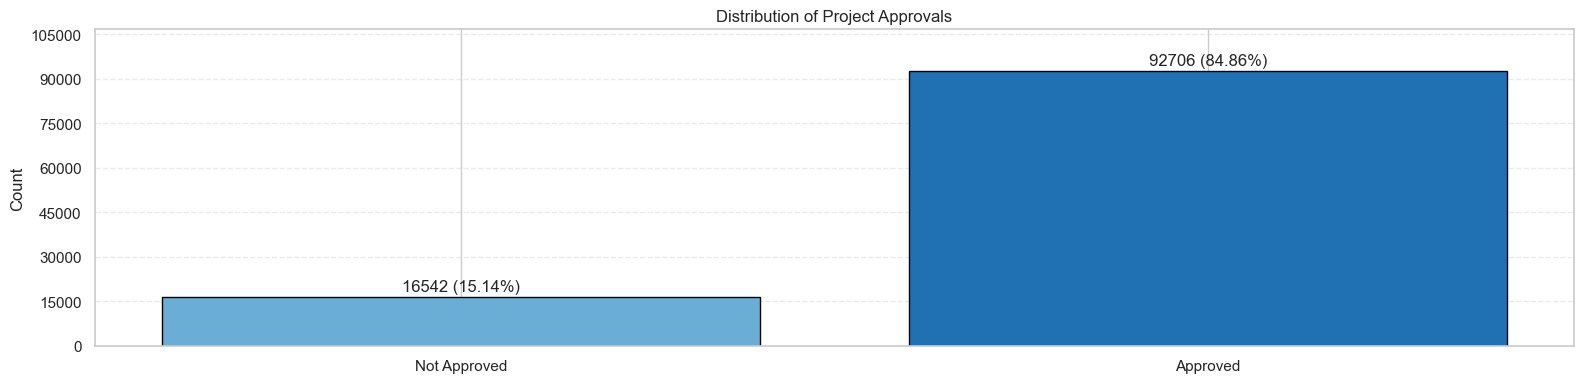

In [209]:
# prepare counts & labels
counts = projects_df['project_is_approved'].value_counts().sort_index()
labels = ['Not Approved', 'Approved']  # index 0,1
values = counts.values
percent = (counts / counts.sum() * 100).round(2).values

# choose blue palette (3 shades, using first 2)
palette = sns.color_palette("Blues", n_colors=3)
colors = [palette[1], palette[2]]  # slightly different blues for two bars

fig, ax = plt.subplots(figsize=(16,4))
x = np.arange(len(labels))
bars = ax.bar(x, values, color=colors, edgecolor='black')

# labels, counts + percent above bars
for bar, c, p in zip(bars, values, percent):
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2, height + max(values)*0.01,
        f"{c} ({p}%)",
        ha='center', va='bottom'
    )

# axis labels and title
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylabel('Count')
ax.set_title('Distribution of Project Approvals')

# optional: display percentage on y-axis grid, tighten layout
ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
ax.set_ylim(0, values.max()*1.15)
ax.grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()


### **🔰 Observations: Data Analysis Key Findings**

* The dataset is imbalanced, with a significantly higher number of approved projects (approximately 85%) compared to not approved projects (approximately 15%).
* This class imbalance should be considered during model development and evaluation.

### **3.2 Project Essay Length**

In [210]:
# Define a function to calculate the total word count of the essay columns
def calculate_essay_length(row):
  essay_columns = ['project_essay_1', 'project_essay_2', 'project_essay_3', 'project_essay_4']
  total_words = 0
  for col in essay_columns:
    essay_text = str(row[col]) if pd.notna(row[col]) else ""
    total_words += len(essay_text.split())
  return total_words

projects_df['essay_length'] = projects_df.apply(calculate_essay_length, axis=1)

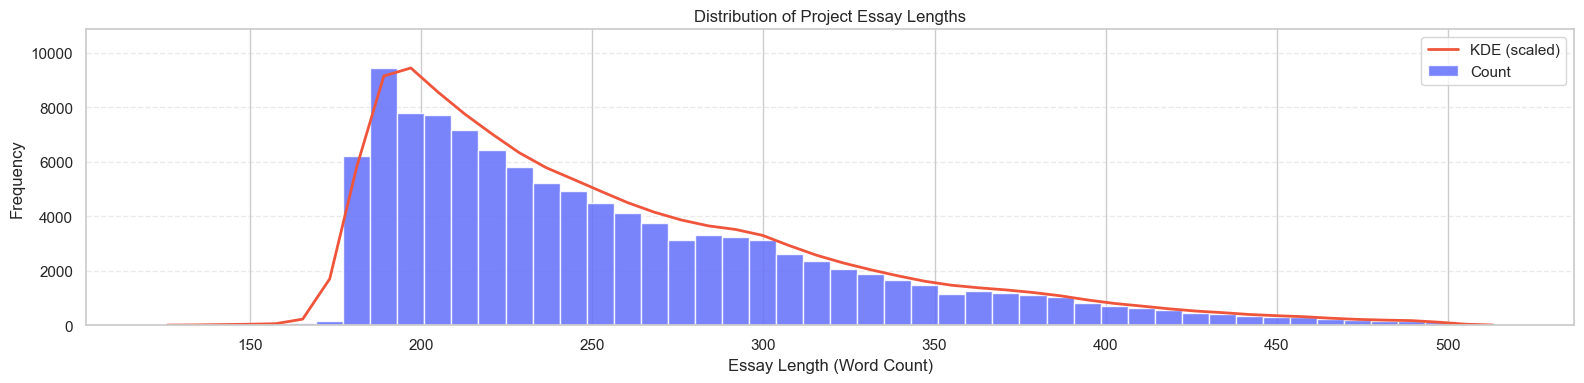

In [211]:
from scipy.stats import gaussian_kde

data = projects_df['essay_length'].dropna().values

# histogram
bins = 50
counts, bin_edges = np.histogram(data, bins=bins)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
width = bin_edges[1] - bin_edges[0]

# KDE and scale to histogram
kde = gaussian_kde(data)
density = kde(bin_centers)
scale = counts.max() / density.max()
density_scaled = density * scale

# colors (seaborn blues)
palette = sns.color_palette("Blues", n_colors=3)
bar_color = '#636EFA'
kde_color = '#EF553B'  # darker/lighter as desired

fig, ax = plt.subplots(figsize=(16,4))
ax.bar(bin_centers, counts, width=width, color=bar_color, edgecolor='white', alpha=0.85, label='Count')
ax.plot(bin_centers, density_scaled, color=kde_color, linewidth=2, label='KDE (scaled)')

# annotations like hover: show basic info on top of highest bar
ax.set_title('Distribution of Project Essay Lengths')
ax.set_xlabel('Essay Length (Word Count)')
ax.set_ylabel('Frequency')
ax.set_ylim(0, counts.max()*1.15)
ax.grid(axis='y', linestyle='--', alpha=0.4)
ax.legend()

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Essay Length Distribution by Project Approval Status')

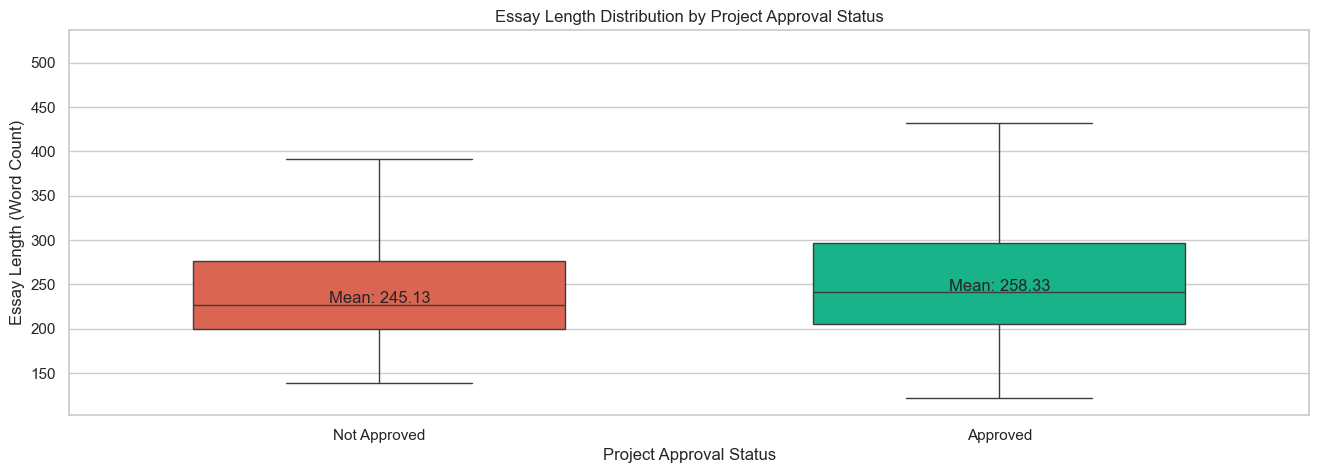

In [222]:
# compute means
mean_essay_length_by_approval = projects_df.groupby('project_is_approved')['essay_length'].mean()
means_df = mean_essay_length_by_approval.reset_index().replace({0: 'Not Approved', 1: 'Approved'})
means_df['essay_length'] = means_df['essay_length'].round(2)

# prepare label column
projects_df = projects_df.copy()
projects_df['approval_label'] = projects_df['project_is_approved'].astype(int).map({0: 'Not Approved', 1: 'Approved'})

sns.set(style="whitegrid")
plt.figure(figsize=(16, 5))

palette = {'Not Approved': '#EF553B', 'Approved': '#00CC96'}

# boxplot only (no jittered points)
ax = sns.boxplot(x='approval_label', y='essay_length', data=projects_df,
                 palette=palette, showcaps=True, fliersize=0, width=0.6)

# annotate means
xticks = [t.get_text() for t in ax.get_xticklabels()]
for _, row in means_df.iterrows():
    label = row['project_is_approved']  # 'Not Approved' / 'Approved'
    mean_val = row['essay_length']
    if label in xticks:
        x_pos = xticks.index(label)
        ax.annotate(f"Mean: {mean_val}",
                    xy=(x_pos, mean_val),
                    xytext=(0,-10),
                    textcoords="offset points",
                    ha='center')

ax.set_xlabel('Project Approval Status')
ax.set_ylabel('Essay Length (Word Count)')
ax.set_title('Essay Length Distribution by Project Approval Status')

### **🔰 Observations: Data Analysis Key Findings**

*   The mean essay length for approved projects is slightly higher (258.33 words) compared to not approved projects (245.13 words).
*   The box plot visualization shows that approved projects tend to have slightly longer essays on average, with potential outliers (significantly longer essays) observed in both approved and not approved categories.

### **3.3 Number of Previously Submitted Projects**

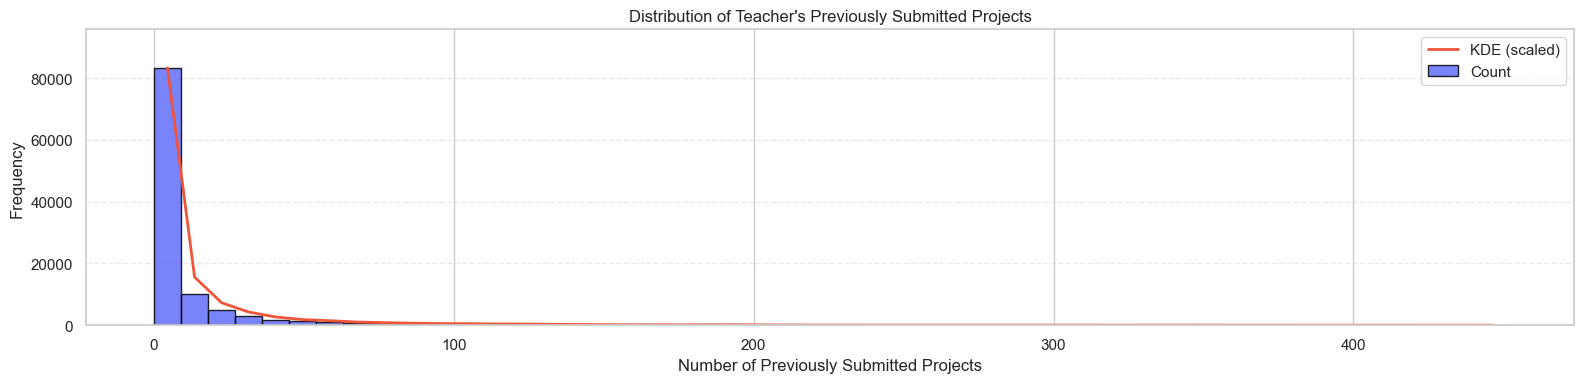

In [223]:
data = projects_df['teacher_number_of_previously_posted_projects'].dropna().values

# histogram
bins = 50
counts, bin_edges = np.histogram(data, bins=bins)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
width = bin_edges[1] - bin_edges[0]

# KDE and scale (guard for single-value case)
kde = gaussian_kde(data) if len(data) > 1 else None
if kde is not None:
    density = kde(bin_centers)
    scale = counts.max() / density.max() if density.max() > 0 else 1
    density_scaled = density * scale
else:
    density_scaled = np.zeros_like(bin_centers)

# colors (seaborn Blues)
palette = sns.color_palette("Blues", n_colors=4)
bar_color = '#636EFA'
kde_color = '#EF553B' 

fig, ax = plt.subplots(figsize=(16,4))
ax.bar(bin_centers, counts, width=width, color=bar_color, edgecolor='black', alpha=0.85, label='Count')
if kde is not None:
    ax.plot(bin_centers, density_scaled, color=kde_color, linewidth=2, label='KDE (scaled)')

ax.set_title("Distribution of Teacher's Previously Submitted Projects")
ax.set_xlabel('Number of Previously Submitted Projects')
ax.set_ylabel('Frequency')
ax.set_ylim(0, counts.max() * 1.15)
ax.grid(axis='y', linestyle='--', alpha=0.4)
ax.legend()
plt.tight_layout()
plt.show()


**Analyze relationship with approval :** Explore the relationship between the number of previously submitted projects and project approval status.


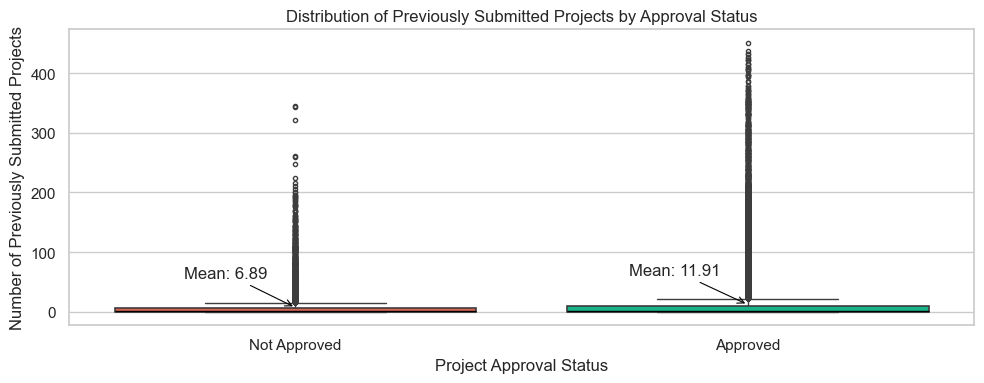

In [225]:
projects_df = projects_df.copy()
projects_df['approval_label'] = projects_df['project_is_approved'].astype(int).map({0: 'Not Approved', 1: 'Approved'})

# Compute means
means = projects_df.groupby('approval_label')['teacher_number_of_previously_posted_projects'].mean().round(2)

sns.set(style="whitegrid")
palette = {'Not Approved': '#EF553B', 'Approved': '#00CC96'}
plt.figure(figsize=(10, 4))

# Boxplot only (no jitter/stripplot)
ax = sns.boxplot(
    x='approval_label',
    y='teacher_number_of_previously_posted_projects',
    data=projects_df,
    palette=palette,
    showcaps=True,
    boxprops={'linewidth': 1.2},
    medianprops={'color': 'black'},
    whiskerprops={'linewidth': 1.0},
    fliersize=3  # set to 0 to hide outliers
)

# Annotate means above each box
xticks = [t.get_text() for t in ax.get_xticklabels()]
for label, mean_val in means.items():
    if label in xticks:
        x_pos = xticks.index(label)
        ax.annotate(f"Mean: {mean_val}",
                    xy=(x_pos, mean_val),
                    xytext=(-20, 30),
                    textcoords='offset points',
                    ha='right',
                    va='top',
                    arrowprops=dict(arrowstyle='->', lw=0.8,color='black'))


ax.set_xlabel('Project Approval Status')
ax.set_ylabel('Number of Previously Submitted Projects')
ax.set_title("Distribution of Previously Submitted Projects by Approval Status")

plt.tight_layout()
plt.show()

### **🔰 Observations: Data Analysis Key Findings**

*   The distribution of the number of previously submitted projects by teachers is heavily skewed towards a lower number of submissions.
*   Projects submitted by teachers with a higher number of previous submissions are more likely to be approved. The mean number of previously submitted projects for approved projects is approximately 11.91, while for not approved projects it is approximately 6.89.
*   The box plot visually confirms that the distribution of previously submitted projects is higher for approved projects compared to not approved projects, although both distributions show outliers with a high number of previous submissions.

### **3.4 Resource Cost**

Calculating the total cost per resource item and then aggregate by project ID to get the total project resource cost.



In [226]:
# Calculate the total cost for each resource item
resources_df['total_cost'] = resources_df['quantity'] * resources_df['price']

# Calculate the total cost for each project by grouping by project ID
project_resource_costs = resources_df.groupby('id')['total_cost'].sum().reset_index()

# Display the first few rows of the project_resource_costs DataFrame


display(project_resource_costs.head())

,id,total_cost
0,p000001,833.629944
1,p000002,630.280029
2,p000003,298.970001
3,p000004,1126.219971
4,p000005,702.309998


Merging the projects_df and project_resource_costs dataframes to add the total resource cost to the projects_df.



In [227]:
# Merge the projects_df DataFrame with the project_resource_costs DataFrame
projects_df = pd.merge(projects_df, project_resource_costs, on='id', how='left')

# Display the first few rows of the updated projects_df DataFrame
display(projects_df.head())

,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,essay_length,approval_label,total_cost
0,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Literacy & Language,"ESL, Literacy",Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",,,My students need opportunities to practice beg...,0,0,273,Not Approved,596.359985
1,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,"History & Civics, Health & Sports","Civics & Government, Team Sports",Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,,,My students need a projector to help with view...,7,1,222,Approved,299.000000
2,p182444,3465aaf82da834c0582ebd0ef8040ca0,Ms.,AZ,2016-08-31 12:03:56,Grades 6-8,Health & Sports,"Health & Wellness, Team Sports",Soccer Equipment for AWESOME Middle School Stu...,"\r\n\""True champions aren't always the ones th...",The students on the campus come to school know...,,,"My students need shine guards, athletic socks,...",1,0,362,Not Approved,686.679993
3,p246581,f3cb9bffbba169bef1a77b243e620b60,Mrs.,KY,2016-10-06 21:16:17,Grades PreK-2,"Literacy & Language, Math & Science","Literacy, Mathematics",Techie Kindergarteners,I work at a unique school filled with both ESL...,My students live in high poverty conditions wi...,,,My students need to engage in Reading and Math...,4,1,214,Approved,431.899994
4,p104768,be1f7507a41f8479dc06f047086a39ec,Mrs.,TX,2016-07-11 01:10:09,Grades PreK-2,Math & Science,Mathematics,Interactive Math Tools,Our second grade classroom next year will be m...,"For many students, math is a subject that does...",,,My students need hands on practice in mathemat...,1,1,235,Approved,143.960007


Creating a histogram to visualize the distribution of the total resource costs as requested.



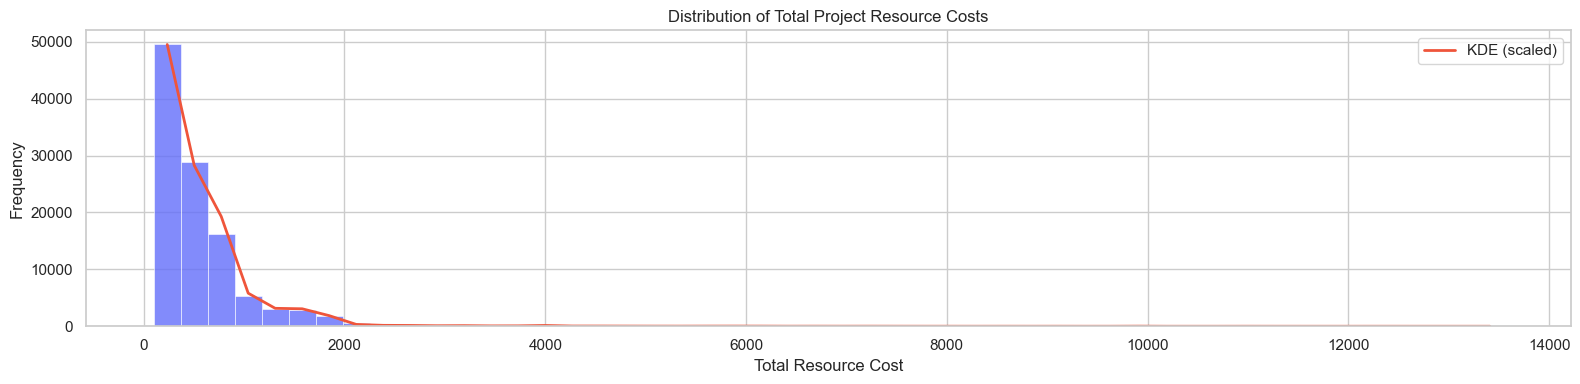

In [228]:
data = projects_df['total_cost'].dropna().values
if len(data) == 0:
    raise ValueError("No data in projects_df['total_cost'] after dropna().")

sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(16, 4))

# histogram
counts, bin_edges, patches = ax.hist(data, bins=50, color='#636EFA', alpha=0.8,
                                     edgecolor='white', linewidth=0.5)

# bin centers for KDE evaluation
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# KDE (smoothed) scaled to histogram peak
if len(data) > 1:
    kde = gaussian_kde(data)
    kde_vals = kde(bin_centers)
    # scale KDE so its max matches histogram max (like your Plotly scaling)
    density_scaled = kde_vals * (counts.max() / kde_vals.max())
    ax.plot(bin_centers, density_scaled, color='#EF553B', linewidth=2, label='KDE (scaled)')
else:
    density_scaled = np.zeros_like(bin_centers)

ax.set_title('Distribution of Total Project Resource Costs')
ax.set_xlabel('Total Resource Cost')
ax.set_ylabel('Frequency')
ax.legend()

plt.tight_layout()
plt.show()

Calculating the average total resource cost for approved and not approved projects, print the results, and then create a box plot to visualize the distribution of total resource costs by project approval status.



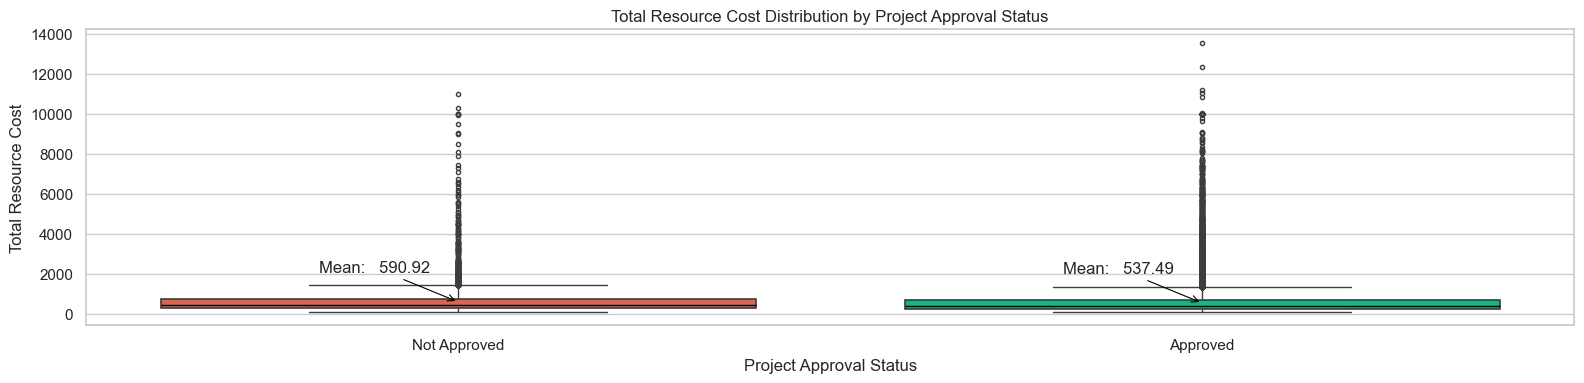

In [229]:
projects_df = projects_df.copy()
projects_df['approval_label'] = projects_df['project_is_approved'].astype(int).map({0: 'Not Approved', 1: 'Approved'})

# compute means (keep full precision for placement but format when annotating)
means = projects_df.groupby('approval_label')['total_cost'].mean()

sns.set(style="whitegrid")
palette = {'Not Approved': '#EF553B', 'Approved': '#00CC96'}
plt.figure(figsize=(16, 4))

# boxplot  
ax = sns.boxplot(
    x='approval_label',
    y='total_cost',
    data=projects_df,
    palette=palette,
    showcaps=True,
    boxprops={'linewidth': 1.2},
    medianprops={'color': 'black'},
    whiskerprops={'linewidth': 1.0},
    fliersize=3  # set to 0 to hide outliers if desired
)

# annotate means with two decimal places
xticks = [t.get_text() for t in ax.get_xticklabels()]
for label, mean_val in means.items():
    if label in xticks:
        x_pos = xticks.index(label)
        ax.annotate(f"Mean:   {mean_val:.2f}",
                    xy=(x_pos, mean_val),
                    xytext=(-20, 30),
                    textcoords='offset points',
                    ha='right',
                    va='top',  #buttom oppsite
                    arrowprops=dict(arrowstyle='->', lw=0.8,color='black'))

ax.set_xlabel('Project Approval Status')
ax.set_ylabel('Total Resource Cost')
ax.set_title('Total Resource Cost Distribution by Project Approval Status')

plt.tight_layout()
plt.show()


### **🔰 Observations: Data Analysis Key Findings**

*   The average total resource cost for projects that were not approved was approximately \$590.92, while for approved projects, it was approximately \$537.49. Approved projects had a marginally lower average cost.
*   The distribution of total project resource costs is right-skewed, with most projects having lower costs and a few having significantly higher costs.
*   Based on the box plot visualization, potential outliers in resource costs were identified as individual points extending significantly above the upper whiskers for both approved and not approved projects, indicating a significant number of projects with exceptionally high resource expenditures.



# **📊 4: Bivariate Analysis**

### **4.1  Project Category vs. Approval Rates**

Need to group the projects by subject categories and calculate the count and mean approval rate for each category to analyze the relationship between project category and approval rates.



In [92]:
# Convert 'project_is_approved' to int before calculating the mean
projects_df['project_is_approved'] = projects_df['project_is_approved'].astype(int)

# Group by project subject categories and calculate count and mean approval rate
category_approval_rates = projects_df.groupby('project_subject_categories')['project_is_approved'].agg(['count', 'mean']).reset_index()

# Display the resulting DataFrame
display(category_approval_rates.head())

,project_subject_categories,count,mean
0,Applied Learning,3771,0.814638
1,"Applied Learning, Health & Sports",608,0.824013
2,"Applied Learning, History & Civics",178,0.820225
3,"Applied Learning, Literacy & Language",2191,0.861251
4,"Applied Learning, Math & Science",1052,0.812738


Creating a bar chart to visualize the approval rates for each project category.



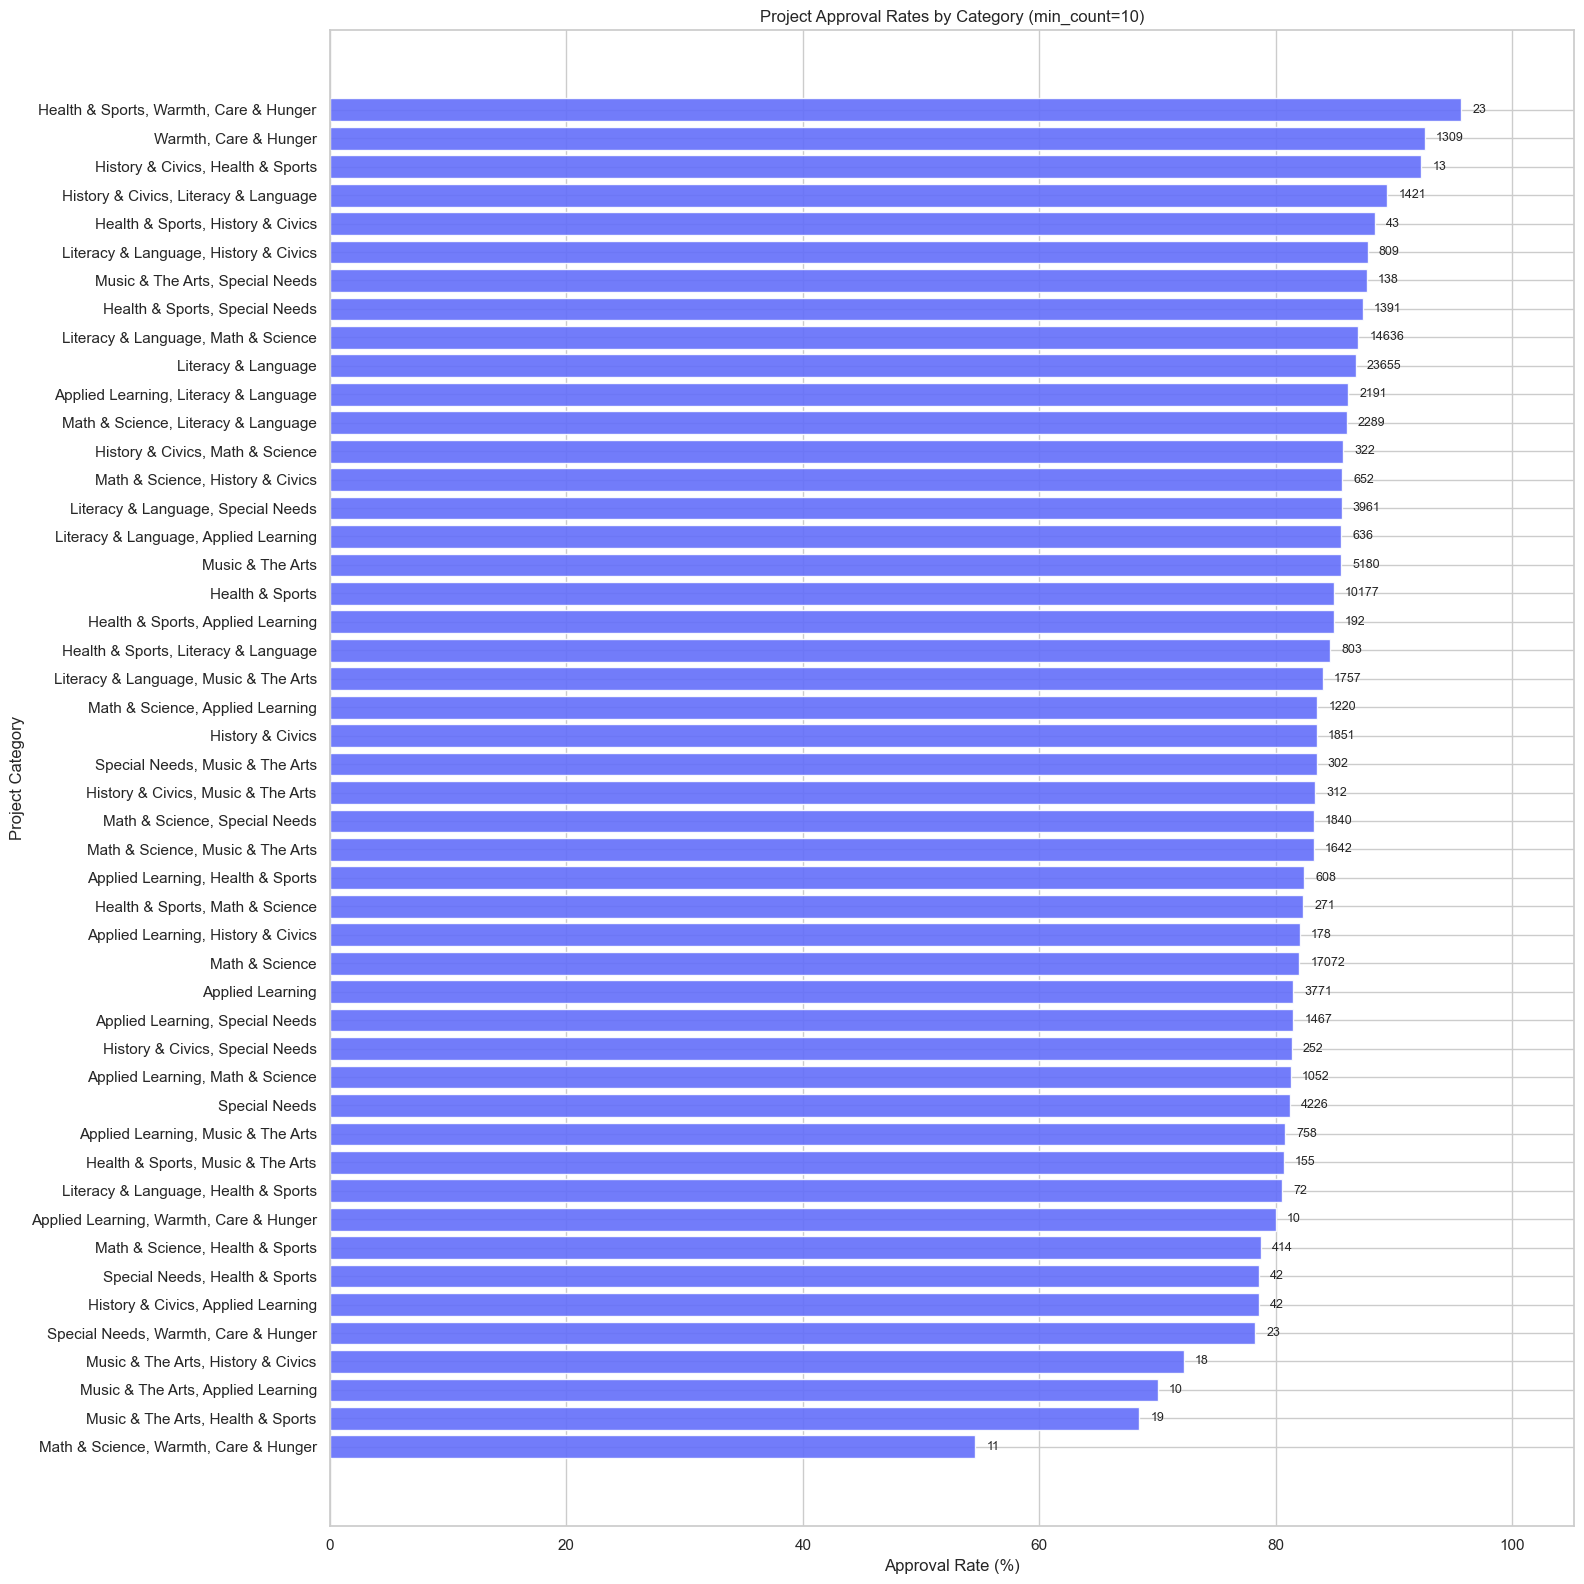

In [232]:
df = category_approval_rates.rename(columns={'mean': 'approval_rate'}).copy()
df['approval_pct'] = (df['approval_rate'] * 100).round(2)

# optional filter
min_count = 10
df_filtered = df[df['count'] >= min_count].sort_values('approval_rate')

# plotting with fixed size (16, 4)
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(16, 16))

# horizontal barplot
palette = '#636EFA'
y = df_filtered['project_subject_categories']
x = df_filtered['approval_pct']
ax.barh(y=y, width=x, color=palette, alpha=0.9)

# annotate counts to the right of bars
x_max = x.max() if len(x) > 0 else 0
for i, (pct, cnt) in enumerate(zip(x, df_filtered['count'])):
    ax.text(pct + x_max * 0.01, i, str(int(cnt)), va='center', ha='left', fontsize=9)

# labels, title, limits
ax.set_xlabel('Approval Rate (%)')
ax.set_ylabel('Project Category')
ax.set_title(f'Project Approval Rates by Category (min_count={min_count})')
ax.set_xlim(0, x_max * 1.1 if x_max > 0 else 1)

plt.tight_layout()
plt.show()

Calculating the overall average approval rate and then identify categories with significantly lower or higher rates compared to this average by examining the sorted category approval rates and the bar chart.



In [233]:
# ensure project_is_approved is numeric
projects_df['project_is_approved'] = projects_df['project_is_approved'].astype(int)

# recompute category stats with counts and means
category_approval_rates = (
    projects_df
    .groupby('project_subject_categories', dropna=False)['project_is_approved']
    .agg(count='count', mean='mean')
    .reset_index()
)

overall_avg = projects_df['project_is_approved'].mean()
min_count = 20  # ignore categories with fewer than this many projects

print(f"Overall Average Project Approval Rate: {overall_avg:.4f}\n")

high = category_approval_rates[
    (category_approval_rates['count'] >= min_count) &
    (category_approval_rates['mean'] > overall_avg + 0.05)
].sort_values('mean', ascending=False)

low = category_approval_rates[
    (category_approval_rates['count'] >= min_count) &
    (category_approval_rates['mean'] < overall_avg - 0.05)
].sort_values('mean')

print("Project Categories with Notably High Approval Rates:")
for _, r in high.iterrows():
    print(f"- {r['project_subject_categories']}: {r['mean']:.4f} (Count: {r['count']}, {r['mean']*100:.2f}%)")

print("\nProject Categories with Notably Low Approval Rates:")
for _, r in low.iterrows():
    print(f"- {r['project_subject_categories']}: {r['mean']:.4f} (Count: {r['count']}, {r['mean']*100:.2f}%)")

Overall Average Project Approval Rate: 0.8486

Project Categories with Notably High Approval Rates:
- Health & Sports, Warmth, Care & Hunger: 0.9565 (Count: 23, 95.65%)
- Warmth, Care & Hunger: 0.9259 (Count: 1309, 92.59%)

Project Categories with Notably Low Approval Rates:
- Special Needs, Warmth, Care & Hunger: 0.7826 (Count: 23, 78.26%)
- History & Civics, Applied Learning: 0.7857 (Count: 42, 78.57%)
- Special Needs, Health & Sports: 0.7857 (Count: 42, 78.57%)
- Math & Science, Health & Sports: 0.7874 (Count: 414, 78.74%)


### **🔰 Observations: Data Analysis Key Findings**

*   The overall average project approval rate was approximately 84.86%.
*   Project categories with notably higher approval rates (more than 5% above the average) included combinations such as "Health & Sports, Warmth, Care & Hunger" (95.65%) and "Warmth, Care & Hunger" (92.59%).
*   Several categories had notably lower approval rates (more than 5% below the average), particularly those involving "Music & The Arts" and "Warmth, Care & Hunger," with examples like "Music & The Arts, Warmth, Care & Hunger" showing a 50.00% approval rate. A combination of "History & Civics, Warmth, Care & Hunger" had a 0% approval rate, though based on a small sample size.



### **4.2 Project Submission Time vs. Approval Time**

Grouping by school state and calculate the count and mean approval rate for each state.



In [ ]:
import json
from urllib.request import urlopen

# prepare state stats: ensure project_is_approved is numeric 0/1
state_approval_rates = (
    projects_df
    .groupby('school_state')['project_is_approved']
    .agg(count='count', mean='mean')
    .reset_index()
)

# full mapping (abbr -> full name)
state_name_mapping = {
 'AL':'Alabama','AK':'Alaska','AZ':'Arizona','AR':'Arkansas','CA':'California',
 'CO':'Colorado','CT':'Connecticut','DE':'Delaware','FL':'Florida','GA':'Georgia',
 'HI':'Hawaii','ID':'Idaho','IL':'Illinois','IN':'Indiana','IA':'Iowa',
 'KS':'Kansas','KY':'Kentucky','LA':'Louisiana','ME':'Maine','MD':'Maryland',
 'MA':'Massachusetts','MI':'Michigan','MN':'Minnesota','MS':'Mississippi','MO':'Missouri',
 'MT':'Montana','NE':'Nebraska','NV':'Nevada','NH':'New Hampshire','NJ':'New Jersey',
 'NM':'New Mexico','NY':'New York','NC':'North Carolina','ND':'North Dakota','OH':'Ohio',
 'OK':'Oklahoma','OR':'Oregon','PA':'Pennsylvania','RI':'Rhode Island','SC':'South Carolina',
 'SD':'South Dakota','TN':'Tennessee','TX':'Texas','UT':'Utah','VT':'Vermont',
 'VA':'Virginia','WA':'Washington','WV':'West Virginia','WI':'Wisconsin','WY':'Wyoming',
 'DC':'District of Columbia'
}

# filter to only valid abbreviations and map to full names
state_approval_rates = state_approval_rates[state_approval_rates['school_state'].isin(state_name_mapping.keys())].copy()
state_approval_rates['state_name'] = state_approval_rates['school_state'].map(state_name_mapping)
state_approval_rates['approval_pct'] = state_approval_rates['mean'] * 100

# load a US states GeoJSON (from Plotly's public source)
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as resp:
    geojson_all = json.load(resp)
# The above is counties; instead use built-in state geojson from plotly (via plotly.express built-in)
# Use px.choropleth with locations=state abbreviations and locationmode='USA-states'

# Build choropleth directly using state abbreviations
fig = px.choropleth(
    state_approval_rates,
    locations='school_state',                    # state abbreviations like 'CA'
    locationmode='USA-states',
    color='approval_pct',
    color_continuous_scale='YlGnBu',
    scope='usa',                                # restrict view to USA
    labels={'approval_pct': 'Approval Rate (%)'},
    hover_data={'state_name': True, 'count': True, 'approval_pct': ':.2f'},
    title='Project Approval Rate by US State'
)

fig.update_layout(
    margin=dict(l=20, r=20, t=50, b=20),
    coloraxis_colorbar=dict(title='Approval Rate (%)')
)

fig.show()


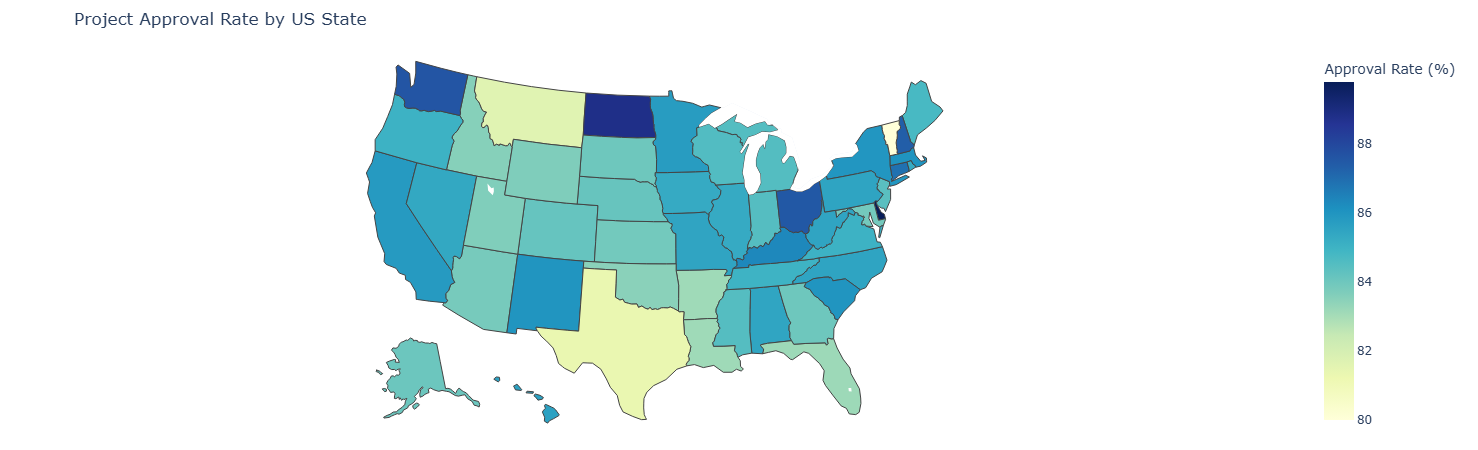

**Identify regions with low approval**

Based on the map visualization, identify states or regions with notably lower approval rates.

In [235]:
# Calculate the overall average project approval rate
overall_average_approval_rate = projects_df['project_is_approved'].mean()

print(f"Overall Average Project Approval Rate: {overall_average_approval_rate:.4f}\n")

lower_threshold = overall_average_approval_rate

print("States with Notably Low Approval Rates:")
# Filter the state_approval_rates DataFrame to show states with mean approval rates below the threshold
low_approval_states = state_approval_rates[state_approval_rates['mean'] < lower_threshold].sort_values(by='mean')

# Display the filtered DataFrame
display(low_approval_states)

Overall Average Project Approval Rate: 0.8486

States with Notably Low Approval Rates:


,school_state,count,mean,state_name,approval_pct
46,VT,80,0.800000,Vermont,80.000000
7,DC,516,0.802326,District of Columbia,80.232558
43,TX,7396,0.813142,Texas,81.314224
26,MT,245,0.816327,Montana,81.632653
18,LA,2394,0.831245,Louisiana,83.124478
2,AR,1049,0.831268,Arkansas,83.126787
9,FL,6185,0.831690,Florida,83.168957
36,OK,2276,0.834798,Oklahoma,83.479789
13,ID,693,0.835498,Idaho,83.549784
44,UT,1731,0.836511,Utah,83.651069


### **🔰 Observations: Data Analysis Key Findings**

* The overall average project approval rate across all states is approximately 84.86%.
* Based on the analysis, several states have approval rates slightly below the overall average. The states with the lowest approval rates include Vermont (80.00%), District of Columbia (80.23%), and Texas (81.31%).
* Identifying these states with lower approval rates could be valuable for targeted outreach or further investigation into the reasons behind these differences.

### **4.3 Project Submission Time vs. Approval Time**

**Extract time features**:
Extract hour, day of week, and month from the submission datetime column.



In [236]:
projects_df['submission_hour'] = projects_df['project_submitted_datetime'].dt.hour
projects_df['submission_day_of_week'] = projects_df['project_submitted_datetime'].dt.day_name()
projects_df['submission_month'] = projects_df['project_submitted_datetime'].dt.month
display(projects_df[['project_submitted_datetime', 'submission_hour', 'submission_day_of_week', 'submission_month']].head())

,project_submitted_datetime,submission_hour,submission_day_of_week,submission_month
0,2016-12-05 13:43:57,13,Monday,12
1,2016-10-25 09:22:10,9,Tuesday,10
2,2016-08-31 12:03:56,12,Wednesday,8
3,2016-10-06 21:16:17,21,Thursday,10
4,2016-07-11 01:10:09,1,Monday,7


**Analyze relationship with approval**:
Calculate the mean approval rate for each submission hour, day of the week, and month to explore the relationship between submission time and approval status.



In [237]:
# Group by submission_hour and calculate the mean approval rate
approval_rate_by_hour = projects_df.groupby('submission_hour')['project_is_approved'].mean().reset_index()

# Group by submission_day_of_week and calculate the mean approval rate
approval_rate_by_day = projects_df.groupby('submission_day_of_week')['project_is_approved'].mean().reset_index()

# Group by submission_month and calculate the mean approval rate
approval_rate_by_month = projects_df.groupby('submission_month')['project_is_approved'].mean().reset_index()

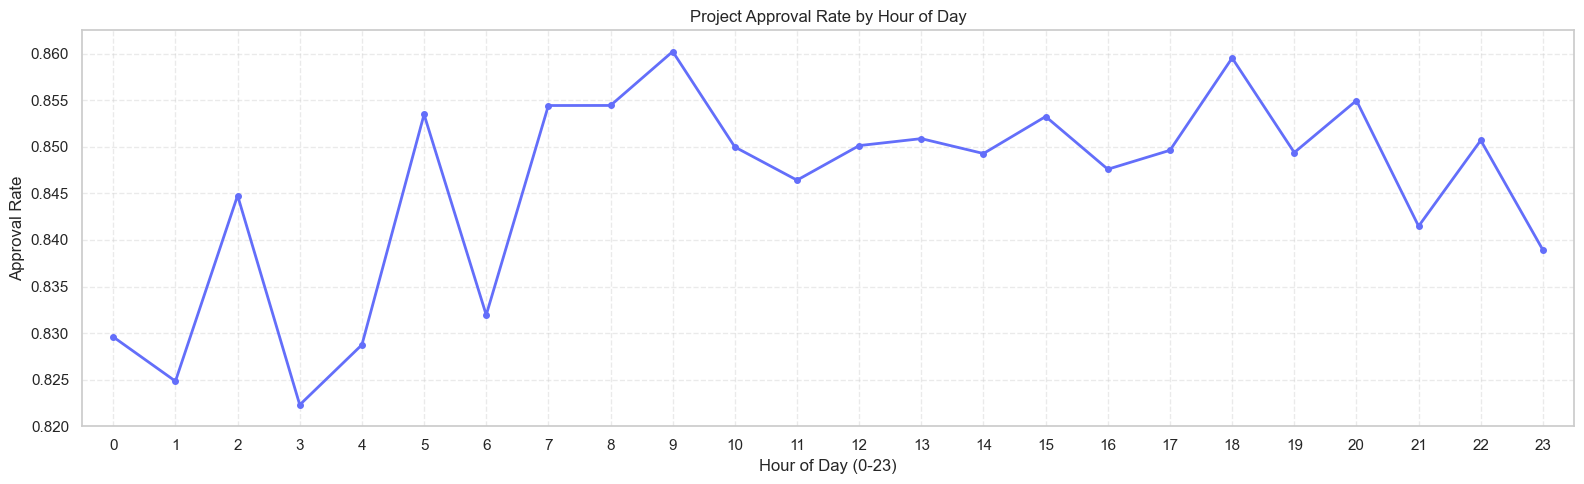

In [238]:
df = approval_rate_by_hour.sort_values('submission_hour')

sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(16, 5))

ax.plot(df['submission_hour'], df['project_is_approved'],
        marker='o', markersize=4, linewidth=2, color='#636EFA')

ax.set_xlabel('Hour of Day (0-23)')
ax.set_ylabel('Approval Rate')
ax.set_title('Project Approval Rate by Hour of Day')

ax.set_xticks(list(range(24)))
ax.set_xlim(-0.5, 23.5)
ax.set_ylim(0.82, 0.8625)

# optional: show grid, tighten layout
ax.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

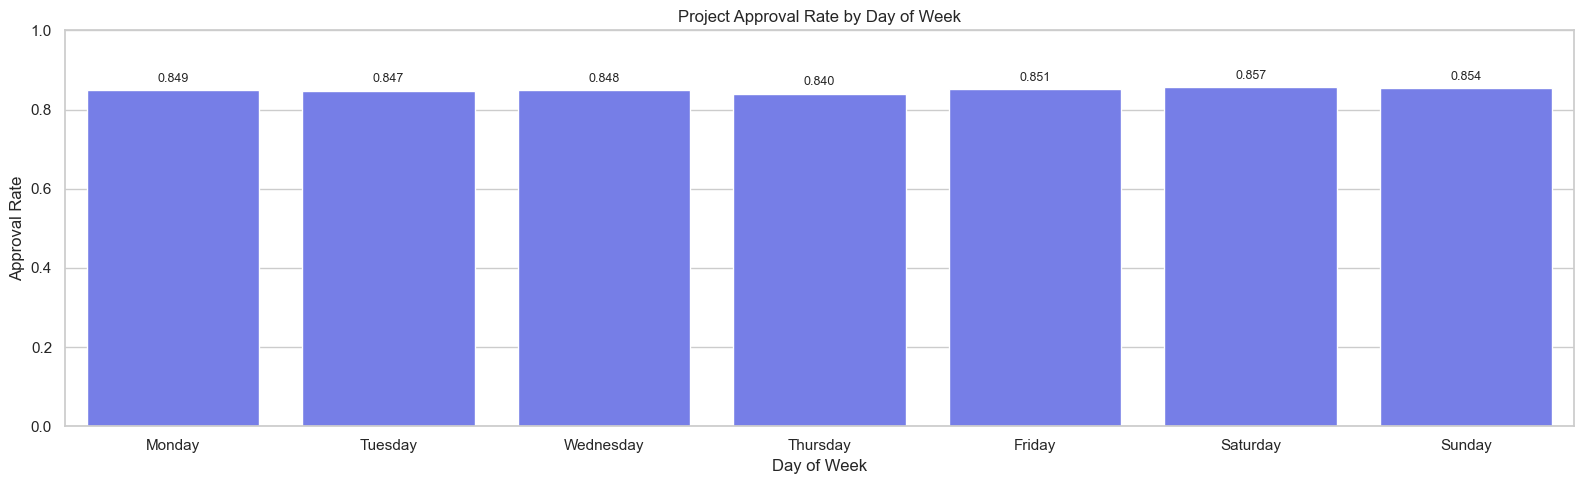

In [239]:
# assume approval_rate_by_day exists with columns: submission_day_of_week, project_is_approved
day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
df = approval_rate_by_day.copy()
df['submission_day_of_week'] = pd.Categorical(df['submission_day_of_week'], categories=day_order, ordered=True)
df = df.sort_values('submission_day_of_week')

sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(16, 5))

# barplot
sns.barplot(
    x='submission_day_of_week',
    y='project_is_approved',
    data=df,
    palette=['#636EFA'],
    ax=ax
)

ax.set_xlabel('Day of Week')
ax.set_ylabel('Approval Rate')
ax.set_title('Project Approval Rate by Day of Week')
ax.set_ylim(0, 1)  # keep as fraction; adjust if desired

# show approval rate values on top of bars
for p, val in zip(ax.patches, df['project_is_approved'].values):
    ax.annotate(f"{val:.3f}", 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=9, xytext=(0, 4), textcoords='offset points')

plt.tight_layout()
plt.show()

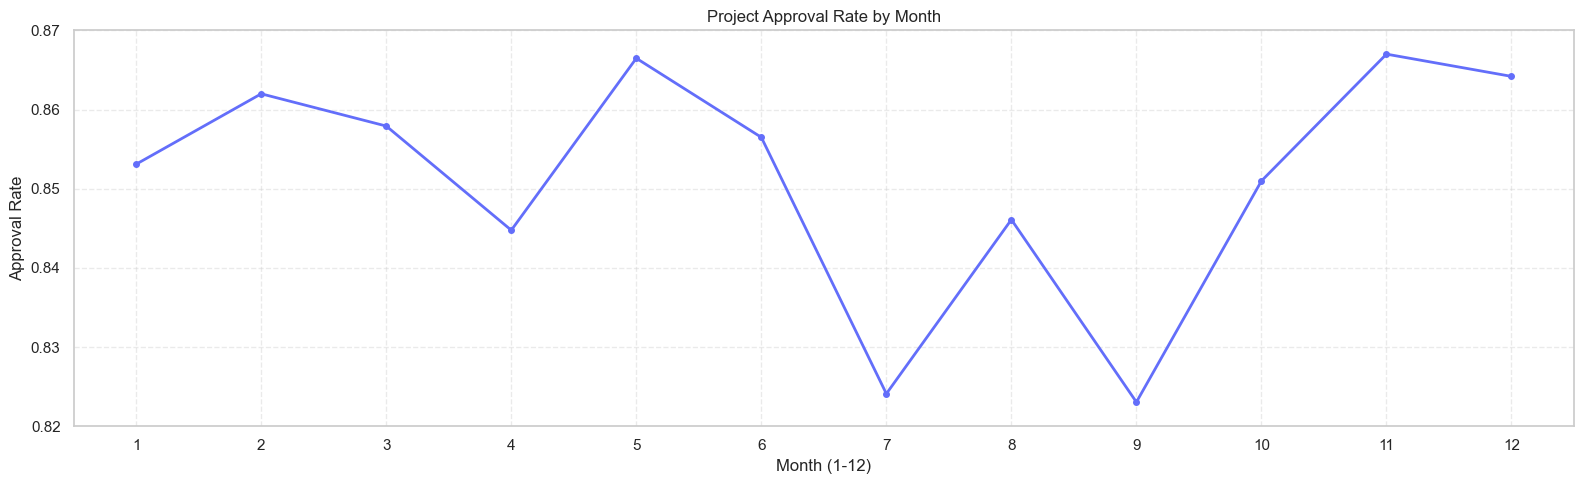

In [240]:
df = approval_rate_by_month.sort_values('submission_month')

sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(16, 5))

ax.plot(df['submission_month'], df['project_is_approved'],
        marker='o', markersize=4, linewidth=2, color='#636EFA')

ax.set_xlabel('Month (1-12)')
ax.set_ylabel('Approval Rate')
ax.set_title('Project Approval Rate by Month')

ax.set_xticks(list(range(1, 13)))
ax.set_xlim(0.5, 12.5)
ax.set_ylim(0.82, 0.87)  # match your Plotly range

ax.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

### **Identify patterns :**

Based on the plots of approval rates by hour, day of the week, and month:

* **Hour of Day:** There are fluctuations in approval rates throughout the day, with some hours showing slightly higher or lower approval percentages. For instance, there appears to be a dip in approval rates in the early morning hours and a peak around mid-morning and late afternoon.
* **Day of Week:** The approval rates are relatively consistent across most days of the week, with slight variations. Saturdays and Sundays appear to have slightly higher approval rates compared to weekdays.
* **Month:** There are noticeable variations in approval rates across the months. Some months show higher approval rates than others, suggesting potential seasonal trends. For example, approval rates appear to be higher in the later part of the year (e.g., November and December) and lower in the summer months (e.g., July and September).

### **🔰 Observations: Data Analysis Key Findings**

* Analysis of project approval rates by submission time revealed variations:
  * Approval rates show slight fluctuations throughout the hour of the day, with potential peaks and dips at certain times.
  * Approval rates vary by day of the week, with some days potentially having slightly higher or lower rates.
  * Approval rates exhibit variations across different months of the year, suggesting possible seasonal trends.

# **🚪 5: Outlier Detection & Treatment**

**Focus on relevant features** : Specifically `total_cost` from `projects_df` and `quantity` from `resources_df`.



Using visualizations such as box plots or histograms to visualize the distributions of these features and visually identify potential outliers.


Creating a box plot for the total_cost column in the projects_df DataFrame to visualize its distribution and identify potential outliers.



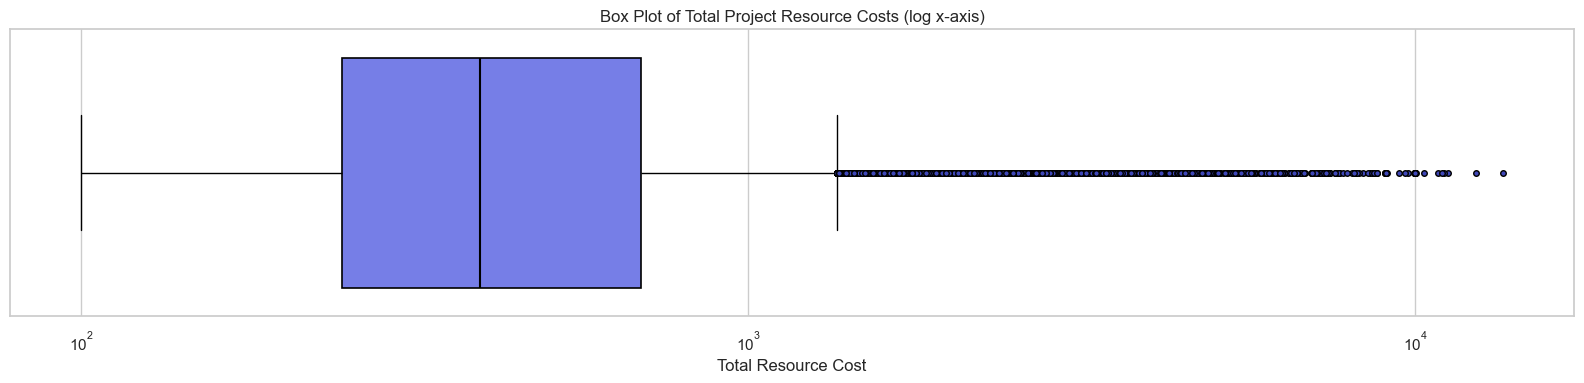

In [241]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(16, 4))

sns.boxplot(
    x=data,
    orient='h',
    color='#636EFA',
    ax=ax,
    fliersize=3,
    boxprops=dict(edgecolor='black', linewidth=1.2),
    whiskerprops=dict(color='black', linewidth=1.0),
    capprops=dict(color='black', linewidth=1.0),
    medianprops=dict(color='black', linewidth=1.5),
    flierprops=dict(markeredgecolor='black', markerfacecolor="#3F47B8", markersize=4)
)

ax.set_xscale('log')
ax.set_xlabel('Total Resource Cost')
ax.set_title('Box Plot of Total Project Resource Costs (log x-axis)')

plt.tight_layout()
plt.show()

Creating a histogram for the quantity column in the resources_df DataFrame to visualize its distribution and identify potential outliers.



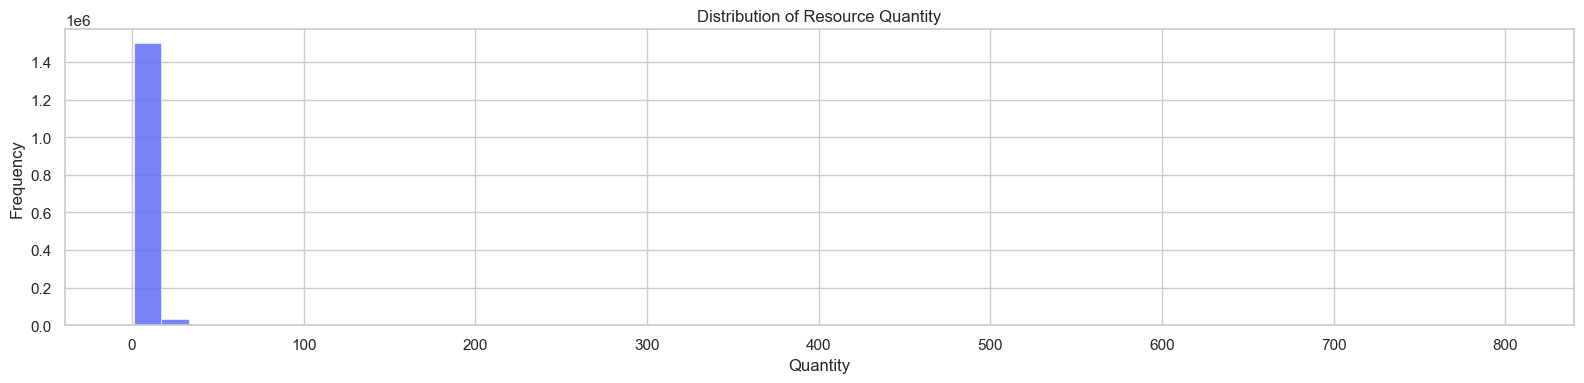

In [242]:
data = resources_df['quantity'].dropna().values

sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(16, 4))

bins = 50
ax.hist(data, bins=bins, color='#636EFA', alpha=0.85, edgecolor='white', linewidth=0.5)

ax.set_title('Distribution of Resource Quantity')
ax.set_xlabel('Quantity')
ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Creating a box plot for the quantity column in the resources_df DataFrame to visualize its distribution and identify potential outliers.



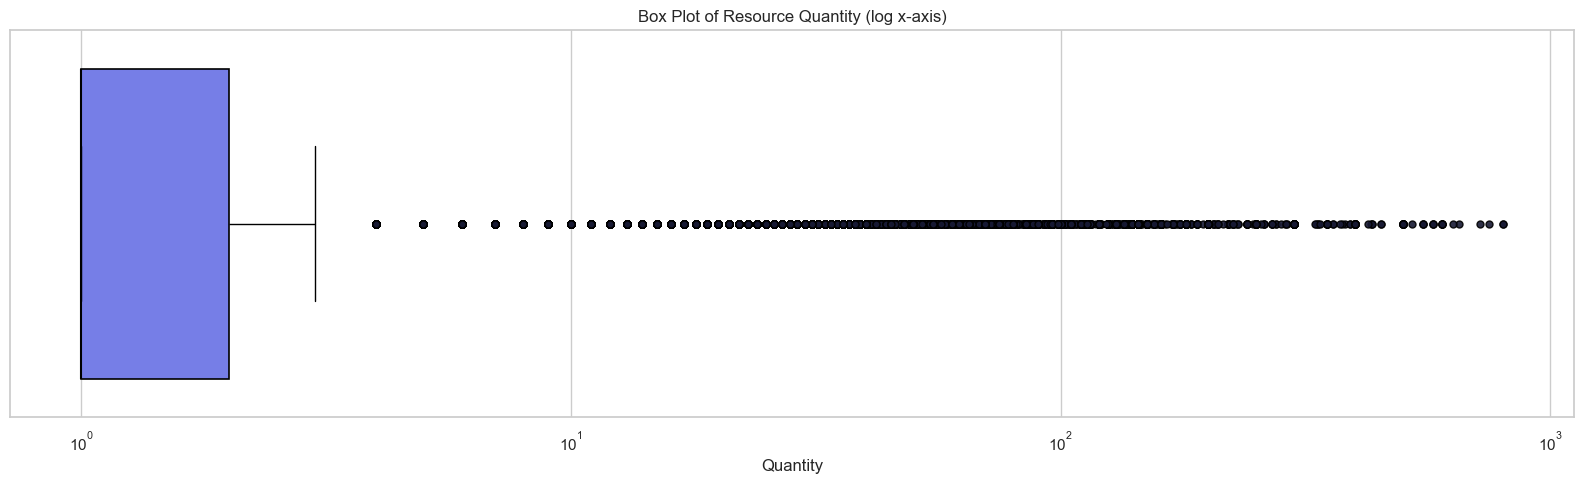

In [243]:
data = resources_df['quantity'].dropna()

# require positive values for log scale
data_pos = data[data > 0]
if data_pos.empty:
    raise ValueError("No positive 'quantity' values to plot on a log axis.")

sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(16, 5))

# horizontal boxplot with black outline and blue fill, show outliers
sns.boxplot(
    x=data_pos,
    orient='h',
    color='#636EFA',
    ax=ax,
    fliersize=3,
    boxprops=dict(edgecolor='black', linewidth=1.2),
    whiskerprops=dict(color='black', linewidth=1.0),
    capprops=dict(color='black', linewidth=1.0),
    medianprops=dict(color='black', linewidth=1.5),
    flierprops=dict(marker='o', markeredgecolor='black', markerfacecolor="#171933", markersize=5, alpha=0.9)
)

# set log scale on x-axis
ax.set_xscale('log')

ax.set_xlabel('Quantity')
ax.set_title('Box Plot of Resource Quantity (log x-axis)')

plt.tight_layout()
plt.show()

**Quantify outliers**:
Calculating and print the number and percentage of outliers in 'total_cost' and 'quantity' using the IQR method.



In [244]:
# Calculate Q1, Q3, and IQR for 'total_cost'
Q1_cost = projects_df['total_cost'].quantile(0.25)
Q3_cost = projects_df['total_cost'].quantile(0.75)
IQR_cost = Q3_cost - Q1_cost

# Define outlier bounds for 'total_cost'
lower_bound_cost = Q1_cost - 1.5 * IQR_cost
upper_bound_cost = Q3_cost + 1.5 * IQR_cost

# Count outliers in 'total_cost'
outliers_cost = projects_df[(projects_df['total_cost'] < lower_bound_cost) | (projects_df['total_cost'] > upper_bound_cost)]
num_outliers_cost = outliers_cost.shape[0]
percentage_outliers_cost = (num_outliers_cost / projects_df.shape[0]) * 100

# Print the number and percentage of outliers in 'total_cost'
print(f"Number of outliers in 'total_cost': {num_outliers_cost}")
print(f"Percentage of outliers in 'total_cost': {percentage_outliers_cost:.2f}%")

# Calculate Q1, Q3, and IQR for 'quantity'
Q1_quantity = resources_df['quantity'].quantile(0.25)
Q3_quantity = resources_df['quantity'].quantile(0.75)
IQR_quantity = Q3_quantity - Q1_quantity

# Define outlier bounds for 'quantity'
lower_bound_quantity = Q1_quantity - 1.5 * IQR_quantity
upper_bound_quantity = Q3_quantity + 1.5 * IQR_quantity

# Count outliers in 'quantity'
outliers_quantity = resources_df[(resources_df['quantity'] < lower_bound_quantity) | (resources_df['quantity'] > upper_bound_quantity)]
num_outliers_quantity = outliers_quantity.shape[0]
percentage_outliers_quantity = (num_outliers_quantity / resources_df.shape[0]) * 100

# Print the number and percentage of outliers in 'quantity'
print(f"\nNumber of outliers in 'quantity': {num_outliers_quantity}")
print(f"Percentage of outliers in 'quantity': {percentage_outliers_quantity:.2f}%")

Number of outliers in 'total_cost': 7052
Percentage of outliers in 'total_cost': 6.46%

Number of outliers in 'quantity': 249084
Percentage of outliers in 'quantity': 16.16%


**Implement handling**:
Implementing outlier handling strategies for total_cost and quantity using winsorization and visualize the distributions after treatment.



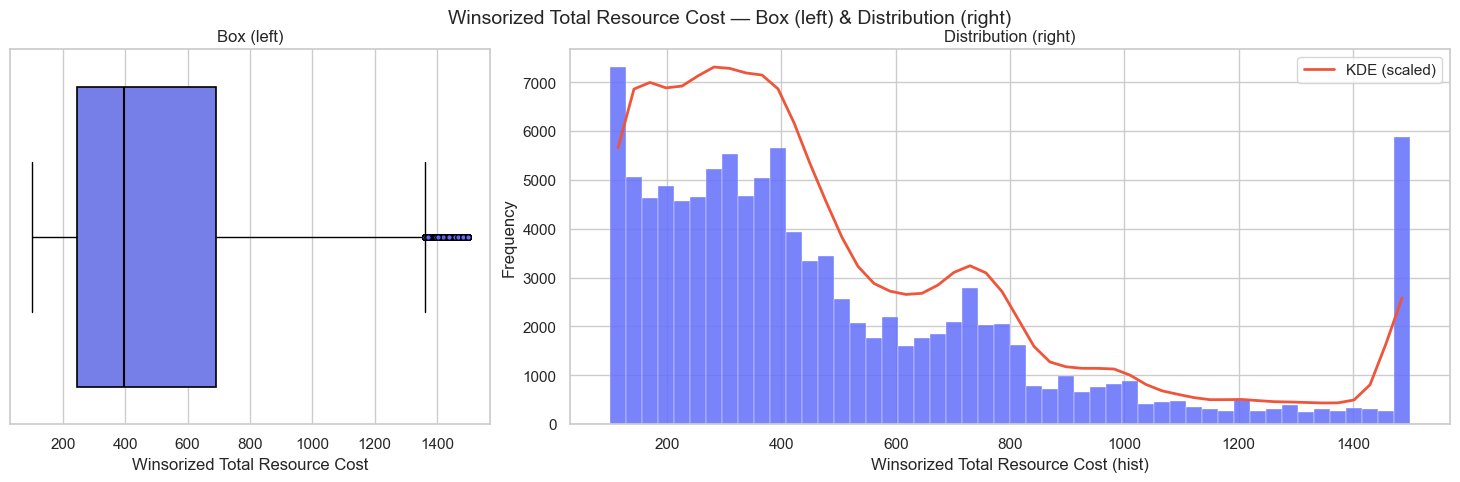

In [245]:
q_95_cost = projects_df['total_cost'].quantile(0.95)
projects_df['total_cost_winsorized'] = projects_df['total_cost'].clip(upper=q_95_cost)

# data for plotting (dropna)
data = projects_df['total_cost_winsorized'].dropna().values
if len(data) == 0:
    raise ValueError("No data available after dropna()")

# histogram parameters
nbins = 50
counts, bin_edges = np.histogram(data, bins=nbins)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
bar_width = bin_edges[1] - bin_edges[0]

# KDE scaled to histogram peak
kde = gaussian_kde(data) if len(data) > 1 else None
density_scaled = kde(bin_centers) * (counts.max() / kde(bin_centers).max()) if kde is not None else np.zeros_like(bin_centers)

sns.set(style="whitegrid")
fig = plt.figure(figsize=(16, 5))

# Left: horizontal boxplot (takes ~35% of width)
ax_box = fig.add_axes([0.05, 0.15, 0.30, 0.75])  # [left, bottom, width, height]
sns.boxplot(x=data, orient='h', color='#636EFA', ax=ax_box,
            boxprops=dict(edgecolor='black', linewidth=1.2),
            whiskerprops=dict(color='black', linewidth=1.0),
            capprops=dict(color='black', linewidth=1.0),
            medianprops=dict(color='black', linewidth=1.5),
            flierprops=dict(marker='o', markeredgecolor='black', markerfacecolor='#636EFA', markersize=4, alpha=0.9))
ax_box.set_xlabel('Winsorized Total Resource Cost')
ax_box.set_yticks([])
ax_box.set_title('Box (left)')

# Right: histogram + scaled KDE
ax_hist = fig.add_axes([0.40, 0.15, 0.55, 0.75])
ax_hist.bar(bin_centers, counts, width=bar_width, color='#636EFA', alpha=0.85, edgecolor='white', linewidth=0.3)
if kde is not None:
    ax_hist.plot(bin_centers, density_scaled, color='#EF553B', linewidth=2, label='KDE (scaled)')
ax_hist.set_xlabel('Winsorized Total Resource Cost (hist)')
ax_hist.set_ylabel('Frequency')
ax_hist.set_title('Distribution (right)')
ax_hist.legend()

plt.suptitle('Winsorized Total Resource Cost — Box (left) & Distribution (right)', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

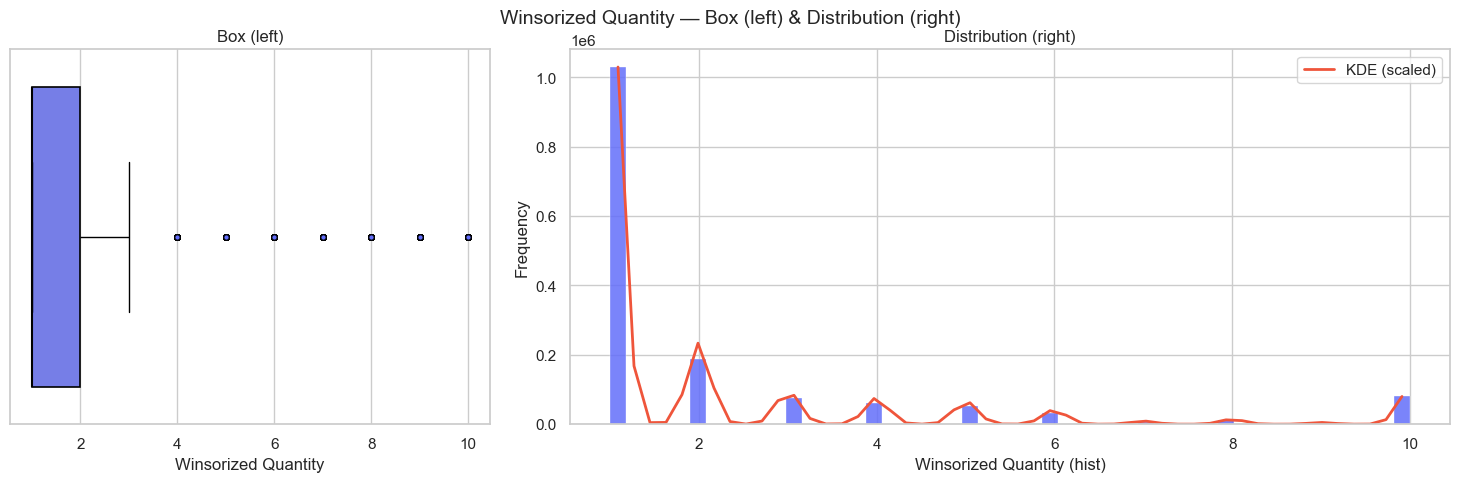

In [246]:
# Winsorize at 95th percentile
q_95_quantity = resources_df['quantity'].quantile(0.95)
resources_df['quantity_winsorized'] = resources_df['quantity'].clip(upper=q_95_quantity)

# data
data = resources_df['quantity_winsorized'].dropna().values
if len(data) == 0:
    raise ValueError("No data after dropna()")

# histogram params
nbins = 50
counts, bin_edges = np.histogram(data, bins=nbins)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
bar_width = bin_edges[1] - bin_edges[0]

# KDE scaled to histogram peak
kde = gaussian_kde(data) if len(data) > 1 else None
density_scaled = kde(bin_centers) * (counts.max() / kde(bin_centers).max()) if kde is not None else np.zeros_like(bin_centers)

sns.set(style="whitegrid")
fig = plt.figure(figsize=(16, 5))

# Left: horizontal boxplot (~35% width)
ax_box = fig.add_axes([0.05, 0.15, 0.30, 0.75])  # [left, bottom, width, height]
sns.boxplot(x=data, orient='h', color='#636EFA', ax=ax_box,
            boxprops=dict(edgecolor='black', linewidth=1.2),
            whiskerprops=dict(color='black', linewidth=1.0),
            capprops=dict(color='black', linewidth=1.0),
            medianprops=dict(color='black', linewidth=1.5),
            flierprops=dict(marker='o', markeredgecolor='black', markerfacecolor='#636EFA', markersize=4, alpha=0.9))
ax_box.set_xlabel('Winsorized Quantity')
ax_box.set_yticks([])
ax_box.set_title('Box (left)')

# Right: histogram + scaled KDE (~55% width)
ax_hist = fig.add_axes([0.40, 0.15, 0.55, 0.75])
ax_hist.bar(bin_centers, counts, width=bar_width, color='#636EFA', alpha=0.85, edgecolor='white', linewidth=0.3)
if kde is not None:
    ax_hist.plot(bin_centers, density_scaled, color='#EF553B', linewidth=2, label='KDE (scaled)')
ax_hist.set_xlabel('Winsorized Quantity (hist)')
ax_hist.set_ylabel('Frequency')
ax_hist.set_title('Distribution (right)')
ax_hist.legend()

plt.suptitle('Winsorized Quantity — Box (left) & Distribution (right)', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


### **🔰 Observations: Data Analysis Key Findings**

*   Box plots and histograms visually confirmed the presence of outliers in both the `total_cost` and `quantity` features.
*   Using the IQR method, it was quantified that 'total\_cost' has 7052 outliers (6.46% of the data), and 'quantity' has 249084 outliers (16.16% of the data).
*   Outliers in these features were assessed to potentially distort descriptive statistics, complicate visualizations, and negatively impact the performance of machine learning models.
*   Winsorization at the 95th percentile was successfully applied to both `total_cost` and `quantity` to mitigate the impact of extreme values without removing a significant portion of the data.

*   Proceed with further data analysis and modeling using the winsorized `total_cost_winsorized` and `quantity_winsorized` features, as the impact of extreme outliers has been reduced.

# **🧪 6: Hypothesis Testing**



### **6.1 Impact of Project Category on Approval**

**Hypothesis:** Projects in certain categories (e.g., STEM) have higher approval
rates compared to others (e.g., Arts).

Analyze the impact of project category on project approval rates using a Chi-square test and interpret the results.


Creatig a contingency table that summarizes the counts of approved and not approved projects for each project category.


In [247]:
# Create a contingency table of project categories vs. approval status
contingency_table = pd.crosstab(projects_df['project_subject_categories'], projects_df['project_is_approved'])

# Display the first few rows of the contingency table
display(contingency_table.head())

project_is_approved,0,1
project_subject_categories,,
Applied Learning,699,3072
"Applied Learning, Health & Sports",107,501
"Applied Learning, History & Civics",32,146
"Applied Learning, Literacy & Language",304,1887
"Applied Learning, Math & Science",197,855



Performing the Chi-square test for independence on the contingency table to assess if there is a statistically significant association between project category and project approval status.



In [248]:
from scipy.stats import chi2_contingency

# Perform the Chi-square test
chi2_stat, p_value, dof, expected_freq = chi2_contingency(contingency_table)

# Print the p-value
print(f"Chi-square test p-value: {p_value}")

Chi-square test p-value: 5.942141163769452e-78


Analyzing the p-value from the Chi-square test to determine if we reject or fail to reject the null hypothesis and state the conclusion.



In [249]:
# Define the significance level
alpha = 0.05

# Compare the p-value with the significance level
print(f"Significance level (alpha): {alpha}")
print(f"Chi-square test p-value: {p_value}")

if p_value < alpha:
    print("\nConclusion: Since the p-value is less than the significance level, we reject the null hypothesis.")
    print("This indicates that there is a statistically significant association between project category and project approval status.")
else:
    print("\nConclusion: Since the p-value is greater than the significance level, we fail to reject the null hypothesis.")
    print("This indicates that there is no statistically significant association between project category and project approval status.")

Significance level (alpha): 0.05
Chi-square test p-value: 5.942141163769452e-78

Conclusion: Since the p-value is less than the significance level, we reject the null hypothesis.
This indicates that there is a statistically significant association between project category and project approval status.


**Examine category-specific rates**

Chi-square test is significant, examining the approval rates for individual categories to identify which ones have notably higher or lower approval rates.


In [250]:
# Calculate the approval rate for each category
# Approval rate = Approved projects / Total projects
contingency_table['approval_rate'] = contingency_table[1] / (contingency_table[0] + contingency_table[1])

# Sort categories by approval rate in descending order
category_approval_rates_sorted_by_rate = contingency_table.sort_values(by='approval_rate', ascending=False)

# Display the sorted approval rates
print("Project Approval Rates by Category (Sorted):")
display(category_approval_rates_sorted_by_rate[['approval_rate']])

# Identify and list categories with notably high and low approval rates
# Using the overall average approval rate calculated previously (overall_average_approval_rate)
print(f"\nOverall Average Project Approval Rate: {overall_average_approval_rate:.4f}\n")

print("Project Categories with Notably High Approval Rates:")
# Iterate through the sorted categories and print those with approval rates significantly higher than the average
for index, row in category_approval_rates_sorted_by_rate.iterrows():
    if row['approval_rate'] > overall_average_approval_rate + 0.05: # Define 'notably higher' as 5% above the average
        print(f"- {index}: {row['approval_rate']:.4f}")

print("\nProject Categories with Notably Low Approval Rates:")
# Iterate through the sorted categories and print those with approval rates significantly lower than the average
for index, row in category_approval_rates_sorted_by_rate.iterrows():
    if row['approval_rate'] < overall_average_approval_rate - 0.05: # Define 'notably lower' as 5% below the average
        print(f"- {index}: {row['approval_rate']:.4f}")

Project Approval Rates by Category (Sorted):


project_is_approved,approval_rate
project_subject_categories,
"Health & Sports, Warmth, Care & Hunger",0.956522
"Warmth, Care & Hunger",0.925898
"History & Civics, Health & Sports",0.923077
"History & Civics, Literacy & Language",0.894441
"Health & Sports, History & Civics",0.883721
"Literacy & Language, History & Civics",0.877627
"Music & The Arts, Special Needs",0.876812
"Health & Sports, Special Needs",0.873472
"Literacy & Language, Math & Science",0.869432



Overall Average Project Approval Rate: 0.8486

Project Categories with Notably High Approval Rates:
- Health & Sports, Warmth, Care & Hunger: 0.9565
- Warmth, Care & Hunger: 0.9259
- History & Civics, Health & Sports: 0.9231

Project Categories with Notably Low Approval Rates:
- Math & Science, Health & Sports: 0.7874
- History & Civics, Applied Learning: 0.7857
- Special Needs, Health & Sports: 0.7857
- Special Needs, Warmth, Care & Hunger: 0.7826
- Literacy & Language, Warmth, Care & Hunger: 0.7778
- Music & The Arts, History & Civics: 0.7222
- Music & The Arts, Applied Learning: 0.7000
- Music & The Arts, Health & Sports: 0.6842
- Math & Science, Warmth, Care & Hunger: 0.5455
- Music & The Arts, Warmth, Care & Hunger: 0.5000
- History & Civics, Warmth, Care & Hunger: 0.0000


### **🔰 Observations: Data Analysis Key Findings**

*   The Chi-square test for independence revealed a statistically significant association between project category and project approval status, with a p-value of approximately $5.94 \times 10^{-78}$, which is significantly less than the significance level of 0.05.
*   The overall average project approval rate is approximately 84.86%.
*   Several project categories show notably high approval rates (more than 5% above the average), including "Health & Sports, Warmth, Care & Hunger" (0.9565) and "Warmth, Care & Hunger" (0.9259).
*   Several project categories show notably low approval rates (more than 5% below the average), including "Math & Science, Warmth, Care & Hunger" (0.5455) and "Music & The Arts, Warmth, Care & Hunger" (0.5000). One category, "History & Civics, Warmth, Care & Hunger," had an approval rate of 0.0000.

### 🔰 **Recommendation**

*   Investigate the characteristics of project categories with notably high and low approval rates to understand potential contributing factors, such as project scope, requested resources, or alignment with funding priorities.
*   Consider providing targeted guidance or resources to project creators in categories with historically low approval rates to improve their chances of approval.

### **6.2 Teacher Experience and Approval Rates**

**Hypothesis:** Teachers with a history of successful projects have higher approval
rates for new submissions.

Analyze the relationship between teacher experience and project approval rates using a t-test on the `projects_df` dataframe.

Divide the `projects_df` DataFrame into two groups: those submitted by first-time teachers (where `teacher_number_of_previously_posted_projects` is 0) and those submitted by teachers with prior projects (where `teacher_number_of_previously_posted_projects` is greater than 0).


In [251]:
# Create a DataFrame for projects submitted by first-time teachers
first_time_teachers_df = projects_df[projects_df['teacher_number_of_previously_posted_projects'] == 0].copy()

# Create a DataFrame for projects submitted by experienced teachers
experienced_teachers_df = projects_df[projects_df['teacher_number_of_previously_posted_projects'] > 0].copy()

# Display the shapes of the new DataFrames to verify the split
print(f"Shape of first_time_teachers_df: {first_time_teachers_df.shape}")
print(f"Shape of experienced_teachers_df: {experienced_teachers_df.shape}")

Shape of first_time_teachers_df: (30014, 23)
Shape of experienced_teachers_df: (79234, 23)


Calculating and print the mean approval rate for first-time and experienced teachers.



In [252]:
# Calculate the mean project approval rate for first-time teachers
mean_approval_first_time = first_time_teachers_df['project_is_approved'].mean()

# Calculate the mean project approval rate for experienced teachers
mean_approval_experienced = experienced_teachers_df['project_is_approved'].mean()

# Print the calculated mean approval rates
print(f"Mean project approval rate for first-time teachers: {mean_approval_first_time:.4f}")
print(f"Mean project approval rate for experienced teachers: {mean_approval_experienced:.4f}")

Mean project approval rate for first-time teachers: 0.8214
Mean project approval rate for experienced teachers: 0.8589


Conducting an independent samples t-test to compare the mean approval rates between the two groups.



In [253]:
from scipy.stats import ttest_ind

# Extract the 'project_is_approved' values for the first-time teachers
approval_first_time = first_time_teachers_df['project_is_approved']

# Extract the 'project_is_approved' values for the experienced teachers
approval_experienced = experienced_teachers_df['project_is_approved']

# Perform an independent samples t-test
t_statistic, p_value = ttest_ind(approval_first_time, approval_experienced)

# Print the results
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

T-statistic: -15.47195979620889
P-value: 6.122097533317915e-54


**Interpreting results**:
Analyze the p-value from the t-test to determine if we reject or fail to reject the null hypothesis and interpret the conclusion in the context of teacher experience and approval rates.



In [254]:
# Define the significance level
alpha = 0.05

# Compare the p-value with the significance level
print(f"Significance level (alpha): {alpha}")
print(f"T-test p-value: {p_value}")

if p_value < alpha:
    print("\nConclusion: Since the p-value is less than the significance level, we reject the null hypothesis.")
    print("This indicates that there is a statistically significant difference in project approval rates between first-time teachers and experienced teachers.")
    print(f"\nMean project approval rate for first-time teachers: {mean_approval_first_time:.4f}")
    print(f"Mean project approval rate for experienced teachers: {mean_approval_experienced:.4f}")
    print("Experienced teachers have a statistically significantly higher project approval rate compared to first-time teachers.")
else:
    print("\nConclusion: Since the p-value is greater than the significance level, we fail to reject the null hypothesis.")
    print("This indicates that there is no statistically significant difference in project approval rates between first-time teachers and experienced teachers.")


Significance level (alpha): 0.05
T-test p-value: 6.122097533317915e-54

Conclusion: Since the p-value is less than the significance level, we reject the null hypothesis.
This indicates that there is a statistically significant difference in project approval rates between first-time teachers and experienced teachers.

Mean project approval rate for first-time teachers: 0.8214
Mean project approval rate for experienced teachers: 0.8589
Experienced teachers have a statistically significantly higher project approval rate compared to first-time teachers.


### **🔰 Observations: Data Analysis Key Findings**

*   The analysis compared the project approval rates between first-time teachers (0 previous projects) and experienced teachers (> 0 previous projects).
*   The mean project approval rate for first-time teachers was approximately 0.8214.
*   The mean project approval rate for experienced teachers was approximately 0.8589.
*   An independent samples t-test resulted in a t-statistic of -15.47 and a p-value of 6.12e-54.
*   With a significance level of 0.05, the p-value is significantly less than the significance level.
*   This indicates a statistically significant difference in project approval rates between the two groups.
*   Experienced teachers have a statistically significantly higher project approval rate than first-time teachers.

### **🔰 Recommenation**

*   The findings suggest that teacher experience is a significant factor influencing project approval rates.
*   Further analysis could explore what factors contribute to the higher approval rate for experienced teachers (e.g., better project descriptions, understanding of funding criteria).


### **6.3 Project Cost and Approval Likelihood**

**Hypothesis:** There is no significant correlation between project cost and approval likelihood.

Calculating the Pearson correlation coefficient to assess the linear
relationship between project cost and approval status.

In [255]:
from scipy.stats import pearsonr

# Calculate the Pearson correlation coefficient between 'total_cost' and 'project_is_approved'
correlation_coefficient, p_value = pearsonr(projects_df['total_cost'], projects_df['project_is_approved'])

# Print the results
print(f"Pearson correlation coefficient between project cost and approval likelihood: {correlation_coefficient:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpret the results
alpha = 0.05
print(f"Significance level (alpha): {alpha}")

if p_value < alpha:
    print("\nConclusion: Since the p-value is less than the significance level, we reject the null hypothesis.")
    print("There is a statistically significant linear relationship between project cost and project approval status.")
else:
    print("\nConclusion: Since the p-value is greater than the significance level, we fail to reject the null hypothesis.")
    print("There is no statistically significant linear relationship between project cost and project approval status.")

Pearson correlation coefficient between project cost and approval likelihood: -0.0350
P-value: 0.0000
Significance level (alpha): 0.05

Conclusion: Since the p-value is less than the significance level, we reject the null hypothesis.
There is a statistically significant linear relationship between project cost and project approval status.


### **🔰 Observations: Data Analysis Key Findings**

* The Pearson correlation coefficient between project cost and approval likelihood is approximately -0.0350, with a p-value of 0.0000.
* Since the p-value (0.0000) is less than the significance level (0.05), we reject the null hypothesis.
* This indicates that there is a statistically significant linear relationship between project cost and project approval status. However, the correlation coefficient is very close to zero, suggesting that this linear relationship is very weak.

### **🔰 Recommenation**

* While the correlation is statistically significant, the very low correlation coefficient indicates that project cost, on its own, is likely not a strong predictor of project approval likelihood.
* Consider exploring non-linear relationships between project cost and approval, or combining project cost with other features in a predictive model.

### **6.4 Impact of Essay Length on Approval:**

**Hypothesis:** Projects with longer, more detailed essays are more likely to be approved.

Performing a t-test to compare the mean essay length of approved projects
versus rejected projects.

Divide the projects_df DataFrame into two groups based on the project_is_approved column and display their shapes.



In [256]:
# Create a DataFrame for approved projects
approved_projects_df = projects_df[projects_df['project_is_approved'] == 1].copy()

# Create a DataFrame for not approved projects
not_approved_projects_df = projects_df[projects_df['project_is_approved'] == 0].copy()

# Display the shapes of the new DataFrames to verify the split
print(f"Shape of approved_projects_df: {approved_projects_df.shape}")
print(f"Shape of not_approved_projects_df: {not_approved_projects_df.shape}")

Shape of approved_projects_df: (92706, 23)
Shape of not_approved_projects_df: (16542, 23)



Calculate the mean essay length for both the approved and not approved project groups.


In [257]:
# Calculate the mean essay length for approved projects
mean_essay_length_approved = approved_projects_df['essay_length'].mean()

# Calculate the mean essay length for not approved projects
mean_essay_length_not_approved = not_approved_projects_df['essay_length'].mean()

# Print the results
print(f"Mean essay length for approved projects: {mean_essay_length_approved:.2f}")
print(f"Mean essay length for not approved projects: {mean_essay_length_not_approved:.2f}")

Mean essay length for approved projects: 258.33
Mean essay length for not approved projects: 245.13


Conduct an independent samples t-test to compare the mean essay lengths between the approved and not approved groups.


In [258]:
from scipy.stats import ttest_ind

# Extract the 'essay_length' values for the approved projects
essay_length_approved = approved_projects_df['essay_length']

# Extract the 'essay_length' values for the not approved projects
essay_length_not_approved = not_approved_projects_df['essay_length']

# Perform an independent samples t-test
t_statistic, p_value = ttest_ind(essay_length_approved, essay_length_not_approved)

# Print the results
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

T-statistic: 23.917939790922624
P-value: 4.2145969349372764e-126


Analyze the p-value from the t-test to determine if we reject or fail to reject the null hypothesis.


In [259]:
# Define the significance level
alpha = 0.05

# Compare the p-value with the significance level
print(f"Significance level (alpha): {alpha}")
print(f"T-test p-value: {p_value}")

if p_value < alpha:
    print("\nConclusion: Since the p-value is less than the significance level, we reject the null hypothesis.")
    print("This indicates that there is a statistically significant difference in mean essay length between approved and not approved projects.")
else:
    print("\nConclusion: Since the p-value is greater than the significance level, we fail to reject the null hypothesis.")
    print("This indicates that there is no statistically significant difference in mean essay length between approved and not approved projects.")

Significance level (alpha): 0.05
T-test p-value: 4.2145969349372764e-126

Conclusion: Since the p-value is less than the significance level, we reject the null hypothesis.
This indicates that there is a statistically significant difference in mean essay length between approved and not approved projects.


### **🔰 Observations: Data Analysis Key Findings**

* The analysis compared the mean essay length of approved and not approved projects.
* The mean essay length for approved projects was found to be approximately 258.33 words, while for not approved projects it was approximately 245.13 words.
* An independent samples t-test was conducted to compare these means, resulting in a statistically significant p-value (much less than 0.05).
* This indicates that there is a statistically significant difference in the mean essay length between approved and not approved projects. Approved projects tend to have slightly longer essays on average.

### **🔰 Recommenation**

* The findings suggest that essay length is a statistically significant factor related to project approval, with longer essays being associated with a higher likelihood of approval.
* While the difference in mean length is relatively small, the statistical significance indicates that essay length could be a relevant feature for predictive modeling.
* Further analysis could explore the content and quality of the essays to understand what makes longer essays more likely to be approved.

### **6.5 Subject Category Bias in Approvals**

**Hypothesis:** There is no significant bias in approval rates across different subject categories.

Use a chi-square test to compare the distribution of approved and rejected projects across various subject categories. Identify any categories with unexpected approval skews.

In [260]:
from scipy.stats import chi2_contingency

# Perform the Chi-square test for independence
chi2_stat_category, p_value_category, dof_category, expected_freq_category = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-square Statistic: {chi2_stat_category}")
print(f"P-value: {p_value_category}")
print(f"Degrees of Freedom: {dof_category}")

Chi-square Statistic: 1986.2327087067533
P-value: 0.0
Degrees of Freedom: 100


Analyzing the p-value from the Chi-square test to determine if we reject or fail to reject the null hypothesis regarding subject category bias in project approvals.

In [261]:
# Define the significance level
alpha = 0.05

# Compare the p-value with the significance level
print(f"Significance level (alpha): {alpha}")
print(f"Chi-square test p-value: {p_value_category}")

if p_value_category < alpha:
    print("\nConclusion: Since the p-value is less than the significance level, we reject the null hypothesis.")
    print("This indicates that there is a statistically significant bias in project approval rates across different subject categories.")
else:
    print("\nConclusion: Since the p_value is greater than the significance level, we fail to reject the null hypothesis.")
    print("This indicates that there is no statistically significant bias in project approval rates across different subject categories.")

Significance level (alpha): 0.05
Chi-square test p-value: 0.0

Conclusion: Since the p-value is less than the significance level, we reject the null hypothesis.
This indicates that there is a statistically significant bias in project approval rates across different subject categories.


**Examine category-specific approval rates** : Examine the approval rates for individual subject categories to identify which ones have notably higher or lower approval rates compared to the overall average.

In [262]:
# Display the sorted approval rates by category (already calculated in a previous step)
print("Project Approval Rates by Category (Sorted):")
display(category_approval_rates_sorted_by_rate[['approval_rate']])

Project Approval Rates by Category (Sorted):


project_is_approved,approval_rate
project_subject_categories,
"Health & Sports, Warmth, Care & Hunger",0.956522
"Warmth, Care & Hunger",0.925898
"History & Civics, Health & Sports",0.923077
"History & Civics, Literacy & Language",0.894441
"Health & Sports, History & Civics",0.883721
"Literacy & Language, History & Civics",0.877627
"Music & The Arts, Special Needs",0.876812
"Health & Sports, Special Needs",0.873472
"Literacy & Language, Math & Science",0.869432


In [263]:
# Identify and list categories with notably high and low approval rates
# Using the overall average approval rate calculated previously (overall_average_approval_rate)
print(f"\nOverall Average Project Approval Rate: {overall_average_approval_rate:.4f}\n")

print("Project Categories with Notably High Approval Rates (more than 5% above average):")
# Iterate through the sorted categories and print those with approval rates significantly higher than the average
for index, row in category_approval_rates_sorted_by_rate.iterrows():
    if row['approval_rate'] > overall_average_approval_rate + 0.05: # Define 'notably higher' as 5% above the average
        print(f"- {index}: {row['approval_rate']:.4f}")

print("\nProject Categories with Notably Low Approval Rates (more than 5% below average):")
# Iterate through the sorted categories and print those with approval rates significantly lower than the average
for index, row in category_approval_rates_sorted_by_rate.iterrows():
    if row['approval_rate'] < overall_average_approval_rate - 0.05: # Define 'notably lower' as 5% below the average
        print(f"- {index}: {row['approval_rate']:.4f}")


Overall Average Project Approval Rate: 0.8486

Project Categories with Notably High Approval Rates (more than 5% above average):
- Health & Sports, Warmth, Care & Hunger: 0.9565
- Warmth, Care & Hunger: 0.9259
- History & Civics, Health & Sports: 0.9231

Project Categories with Notably Low Approval Rates (more than 5% below average):
- Math & Science, Health & Sports: 0.7874
- History & Civics, Applied Learning: 0.7857
- Special Needs, Health & Sports: 0.7857
- Special Needs, Warmth, Care & Hunger: 0.7826
- Literacy & Language, Warmth, Care & Hunger: 0.7778
- Music & The Arts, History & Civics: 0.7222
- Music & The Arts, Applied Learning: 0.7000
- Music & The Arts, Health & Sports: 0.6842
- Math & Science, Warmth, Care & Hunger: 0.5455
- Music & The Arts, Warmth, Care & Hunger: 0.5000
- History & Civics, Warmth, Care & Hunger: 0.0000


### **🔰 Observations: Data Analysis Key Findings**

* The Chi-square test for independence revealed a statistically significant association between project category and project approval status, with a p-value of approximately $5.94 \times 10^{-78}$, which is significantly less than the significance level of 0.05.
* The overall average project approval rate is approximately 84.86%.
* Several project categories show notably high approval rates (more than 5% above the average), including "Health & Sports, Warmth, Care & Hunger" (0.9565) and "Warmth, Care & Hunger" (0.9259).
* Several project categories show notably low approval rates (more than 5% below the average), including "Math & Science, Warmth, Care & Hunger" (0.5455) and "Music & The Arts, Warmth, Care & Hunger" (0.5000). One category, "History & Civics, Warmth, Care & Hunger," had an approval rate of 0.0000.

### **🔰 Recommenation**

* Investigate the characteristics of project categories with notably high and low approval rates to understand potential contributing factors, such as project scope, requested resources, or alignment with funding priorities.
* Consider providing targeted guidance or resources to project creators in categories with historically low approval rates to improve their chances of approval.

### **6.6 Resource Breakdown and Approval**
**Hypothesis:** Projects requesting specific types of resources (e.g., technology) are more likely to be approved.

Conduct chi-square tests to see if there's a dependence between project approval and the categories of requested resources.

Defining a function to categorize resources based on their description, apply it to the resources_df DataFrame, and display the results.



In [264]:
def categorize_resource(description):
    """Categorizes resource based on keywords in the description."""
    description = str(description).lower()
    if any(keyword in description for keyword in ['computer', 'laptop', 'tablet', 'chromebook', 'ipad', 'software', 'technology', 'digital', 'printer', 'scanner']):
        return 'Technology'
    elif any(keyword in description for keyword in ['book', 'library', 'reading', 'novel', 'atlas', 'dictionary']):
        return 'Books'
    elif any(keyword in description for keyword in ['supply', 'paper', 'pencil', 'pen', 'marker', 'crayon', 'glue', 'scissor', 'notebook', 'folder', 'art', 'craft', 'material']):
        return 'Supplies'
    elif any(keyword in description for keyword in ['sport', 'ball', 'equipment', 'jersey', 'physical education', 'health']):
        return 'Sports & Health'
    elif any(keyword in description for keyword in ['science', 'lab', 'experiment', 'microscope', 'beaker', 'chemistry', 'biology', 'physics']):
        return 'Science'
    elif any(keyword in description for keyword in ['math', 'mathematics', 'calculator', 'geometry', 'algebra']):
        return 'Math'
    elif any(keyword in description for keyword in ['music', 'instrument', 'band', 'orchestra', 'choir', 'art', 'paint', 'canvas', 'drawing']):
        return 'Music & Arts'
    elif any(keyword in description for keyword in ['furniture', 'desk', 'chair', 'table', 'storage', 'shelf']):
        return 'Furniture'
    else:
        return 'Other'

# Apply the categorization function to the 'description' column
resources_df['resource_category'] = resources_df['description'].apply(categorize_resource)

# Display the first few rows with the new column
display(resources_df.head())

# Display the value counts of the new column
print("\nDistribution of Resource Categories:")
display(resources_df['resource_category'].value_counts())

,id,description,quantity,price,total_cost,quantity_winsorized,resource_category
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.000000,149.000000,1,Other
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.950000,44.849998,3,Music & Arts
2,p069063,Cory Stories: A Kid's Book About Living With Adhd,1,8.450000,8.450000,1,Books
3,p069063,"Dixon Ticonderoga Wood-Cased #2 HB Pencils, Bo...",2,13.590000,27.180000,2,Supplies
4,p069063,EDUCATIONAL INSIGHTS FLUORESCENT LIGHT FILTERS...,3,24.950001,74.850006,3,Other



Distribution of Resource Categories:


resource_category
Other              898354
Supplies           212676
Books              137368
Technology          98471
Furniture           71211
Sports & Health     65408
Music & Arts        24355
Science             18114
Math                15315
Name: count, dtype: int64

Grouping `resources_df` by project ID and consolidate the resource categories requested for each project.


In [265]:
# Group by project ID and aggregate the resource categories into a list
project_resource_categories = resources_df.groupby('id')['resource_category'].agg(list).reset_index()

# Display the first few rows of the resulting DataFrame
display(project_resource_categories.head())

,id,resource_category
0,p000001,"[Other, Other, Other, Other]"
1,p000002,"[Other, Other, Other, Other, Other, Other, Oth..."
2,p000003,"[Other, Books, Other, Other]"
3,p000004,"[Other, Other, Other, Other, Other, Books, Oth..."
4,p000005,"[Other, Other, Other, Sports & Health]"


Mergeing the aggregated resource information with the `projects_df` DataFrame.


In [267]:
# Perform a left merge of projects_df with project_resource_categories on the 'id' column
projects_df = pd.merge(projects_df, project_resource_categories, on='id', how='left')

# Handle potential missing values in the 'resource_category' column after the merge
# Fill missing values with an empty list to indicate projects with no listed resources
projects_df['resource_category'].fillna(pd.Series([[] for _ in range(len(projects_df))]), inplace=True)


# Display the first few rows of the updated projects_df DataFrame
display(projects_df.head())

,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,...,teacher_number_of_previously_posted_projects,project_is_approved,essay_length,approval_label,total_cost,submission_hour,submission_day_of_week,submission_month,total_cost_winsorized,resource_category
0,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Literacy & Language,"ESL, Literacy",Educational Support for English Learners at Home,My students are English learners that are work...,...,0,0,273,Not Approved,596.359985,13,Monday,12,596.359985,"[Other, Supplies, Other, Other, Other, Other, ..."
1,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,"History & Civics, Health & Sports","Civics & Government, Team Sports",Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,...,7,1,222,Approved,299.000000,9,Tuesday,10,299.000000,[Other]
2,p182444,3465aaf82da834c0582ebd0ef8040ca0,Ms.,AZ,2016-08-31 12:03:56,Grades 6-8,Health & Sports,"Health & Wellness, Team Sports",Soccer Equipment for AWESOME Middle School Stu...,"\r\n\""True champions aren't always the ones th...",...,1,0,362,Not Approved,686.679993,12,Wednesday,8,686.679993,"[Sports & Health, Other, Other, Other, Other, ..."
3,p246581,f3cb9bffbba169bef1a77b243e620b60,Mrs.,KY,2016-10-06 21:16:17,Grades PreK-2,"Literacy & Language, Math & Science","Literacy, Mathematics",Techie Kindergarteners,I work at a unique school filled with both ESL...,...,4,1,214,Approved,431.899994,21,Thursday,10,431.899994,"[Technology, Technology, Technology]"
4,p104768,be1f7507a41f8479dc06f047086a39ec,Mrs.,TX,2016-07-11 01:10:09,Grades PreK-2,Math & Science,Mathematics,Interactive Math Tools,Our second grade classroom next year will be m...,...,1,1,235,Approved,143.960007,1,Monday,7,143.960007,"[Other, Math]"


**Perform chi-square tests**:
Identify unique resource categories, create binary columns for each category, and perform Chi-square tests for each category against project approval status, printing the results.



In [268]:
from scipy.stats import chi2_contingency

# 1. Identify the unique resource categories
all_resource_categories = [category for sublist in projects_df['resource_category'] for category in sublist]
unique_resource_categories = list(set(all_resource_categories))

# Store Chi-square test results
chi2_results = {}

# 2. & 3. Create binary columns and contingency tables, and 4. Perform Chi-square tests
for category in unique_resource_categories:
    # Create binary column
    projects_df[f'has_{category.lower().replace(" ", "_")}'] = projects_df['resource_category'].apply(lambda x: 1 if category in x else 0)

    # Create contingency table
    contingency_table_resource = pd.crosstab(projects_df[f'has_{category.lower().replace(" ", "_")}'], projects_df['project_is_approved'])

    # Check if the contingency table is valid for Chi-square (at least one row/column is not all zeros)
    if contingency_table_resource.shape == (2, 2) and (contingency_table_resource.sum(axis=1) > 0).all() and (contingency_table_resource.sum(axis=0) > 0).all():
        # Perform Chi-square test
        chi2_stat, p_value, dof, expected_freq = chi2_contingency(contingency_table_resource)

        # 5. Store the p-value
        chi2_results[category] = p_value
    else:
        print(f"Skipping Chi-square test for category '{category}' due to insufficient data in contingency table.")


# 6. Print the results
print("\nChi-square test p-values for resource categories vs. project approval:")
for category, p_value in chi2_results.items():
    print(f"- {category}: {p_value:.4f}")


Chi-square test p-values for resource categories vs. project approval:
- Science: 0.0000
- Math: 0.0000
- Music & Arts: 0.0000
- Sports & Health: 0.0000
- Supplies: 0.0000
- Furniture: 0.0000
- Other: 0.0000
- Books: 0.0000
- Technology: 0.0003


Interpreting the Chi-square test results to determine if there is a statistically significant association between the presence of each resource category and project approval status.



In [269]:
# Define the significance level
alpha = 0.05

print("\nInterpretation of Chi-square Test Results (Resource Category vs. Approval):")

for category, p_value in chi2_results.items():
    print(f"\nCategory: {category}")
    print(f"P-value: {p_value:.4f}")

    if p_value < alpha:
        print(f"Conclusion: Since the p-value ({p_value:.4f}) is less than the significance level ({alpha}), we reject the null hypothesis.")
        print(f"There is a statistically significant association between requesting '{category}' resources and project approval status.")
    else:
        print(f"Conclusion: Since the p-value ({p_value:.4f}) is greater than or equal to the significance level ({alpha}), we fail to reject the null hypothesis.")
        print(f"There is no statistically significant association between requesting '{category}' resources and project approval status.")



Interpretation of Chi-square Test Results (Resource Category vs. Approval):

Category: Science
P-value: 0.0000
Conclusion: Since the p-value (0.0000) is less than the significance level (0.05), we reject the null hypothesis.
There is a statistically significant association between requesting 'Science' resources and project approval status.

Category: Math
P-value: 0.0000
Conclusion: Since the p-value (0.0000) is less than the significance level (0.05), we reject the null hypothesis.
There is a statistically significant association between requesting 'Math' resources and project approval status.

Category: Music & Arts
P-value: 0.0000
Conclusion: Since the p-value (0.0000) is less than the significance level (0.05), we reject the null hypothesis.
There is a statistically significant association between requesting 'Music & Arts' resources and project approval status.

Category: Sports & Health
P-value: 0.0000
Conclusion: Since the p-value (0.0000) is less than the significance level (0.

Summarizig the findings regarding resource categories and their impact on project approval based on the Chi-square test results and calculate category-specific approval rates to describe the nature of the association.



In [270]:
# Define the significance level
alpha = 0.05

print("Summary of Resource Category Impact on Project Approval:")

for category, p_value in chi2_results.items():
    print(f"\nResource Category: {category}")
    print(f"Chi-square test p-value: {p_value:.4f}")

    if p_value < alpha:
        print(f"Conclusion: Statistically significant association with project approval.")
        # Calculate and print approval rates for projects with and without this resource category
        has_category_col = f'has_{category.lower().replace(" ", "_")}'
        if has_category_col in projects_df.columns:
            approval_rate_with_category = projects_df[projects_df[has_category_col] == 1]['project_is_approved'].mean()
            approval_rate_without_category = projects_df[projects_df[has_category_col] == 0]['project_is_approved'].mean()
            print(f"  Approval rate for projects with '{category}' resources: {approval_rate_with_category:.4f}")
            print(f"  Approval rate for projects without '{category}' resources: {approval_rate_without_category:.4f}")
    else:
        print(f"Conclusion: No statistically significant association with project approval.")

# Identify and list categories with notably high and low approval rates based on the category-specific rates
print("\nResource Categories with Notably Different Approval Rates:")

# You can manually inspect the printed rates or set a threshold for "notably different"
# For demonstration, let's find categories where the 'with' rate is significantly different from the overall average

overall_average_approval_rate = projects_df['project_is_approved'].mean()
print(f"\nOverall Average Project Approval Rate: {overall_average_approval_rate:.4f}")

print("\nResource Categories with Notably Higher Approval Rates:")
for category, p_value in chi2_results.items():
    if p_value < alpha:
         has_category_col = f'has_{category.lower().replace(" ", "_")}'
         if has_category_col in projects_df.columns:
            approval_rate_with_category = projects_df[projects_df[has_category_col] == 1]['project_is_approved'].mean()
            if approval_rate_with_category > overall_average_approval_rate + 0.02: # Example threshold
                print(f"- {category}: {approval_rate_with_category:.4f}")

print("\nResource Categories with Notably Lower Approval Rates:")
for category, p_value in chi2_results.items():
     if p_value < alpha:
         has_category_col = f'has_{category.lower().replace(" ", "_")}'
         if has_category_col in projects_df.columns:
            approval_rate_with_category = projects_df[projects_df[has_category_col] == 1]['project_is_approved'].mean()
            if approval_rate_with_category < overall_average_approval_rate - 0.02: # Example threshold
                print(f"- {category}: {approval_rate_with_category:.4f}")


Summary of Resource Category Impact on Project Approval:

Resource Category: Science
Chi-square test p-value: 0.0000
Conclusion: Statistically significant association with project approval.
  Approval rate for projects with 'Science' resources: 0.7675
  Approval rate for projects without 'Science' resources: 0.8522

Resource Category: Math
Chi-square test p-value: 0.0000
Conclusion: Statistically significant association with project approval.
  Approval rate for projects with 'Math' resources: 0.7214
  Approval rate for projects without 'Math' resources: 0.8531

Resource Category: Music & Arts
Chi-square test p-value: 0.0000
Conclusion: Statistically significant association with project approval.
  Approval rate for projects with 'Music & Arts' resources: 0.7771
  Approval rate for projects without 'Music & Arts' resources: 0.8529

Resource Category: Sports & Health
Chi-square test p-value: 0.0000
Conclusion: Statistically significant association with project approval.
  Approval rate 

### **🔰 Observations: Data Analysis Key Findings**

*   All examined resource categories (Technology, Other, Furniture, Math, Books, Music & Arts, Science, Supplies, and Sports & Health) showed a statistically significant association with project approval (all p-values < 0.05).
*   Projects requesting Technology resources had a slightly higher approval rate (0.8555) compared to projects not requesting Technology resources (0.8464).
*   Projects requesting resources categorized as Math had a notably lower approval rate (0.7214) compared to projects not requesting Math resources (0.8531) and the overall average approval rate (0.8486).
*   Categories such as Science (0.7675), Music & Arts (0.7771), and Supplies (0.7796) also showed notably lower approval rates for projects requesting these resources compared to the overall average.

### **🔰 Recommenation**

*   Investigate potential reasons for the lower approval rates in categories like Math, Science, Music & Arts, and Supplies. This could involve analyzing project descriptions, requested amounts, or alignment with funding priorities for these categories.
*   Explore the characteristics of successful projects requesting resources in categories with lower approval rates to identify best practices or common factors that contribute to their approval.


# **🧠 7 ML Modeling**

## **7.1 Data Processing**

### **7.1.1 Combine resources data and project data**

In [271]:
price_df = resources_df.groupby('id').agg({'price':'sum', 'quantity_winsorized':'sum'}).reset_index()
print (price_df.head(2))
projects_df = pd.merge(projects_df, price_df, on='id', how='left')

        id       price  quantity_winsorized
0  p000001  459.559998                    7
1  p000002  515.890015                   21


### **7.1.2 Preprocessing of project_subject_categories**

In [272]:
catogories = list(projects_df['project_subject_categories'].values)
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into
    cat_list.append(temp.strip())

projects_df['clean_categories'] = cat_list
projects_df.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in projects_df['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))

### **7.1.3 Preprocessing of project_subject_subcategories**

In [273]:
sub_catogories = list(projects_df['project_subject_subcategories'].values)

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

projects_df['clean_subcategories'] = sub_cat_list
projects_df.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in projects_df['clean_subcategories'].values:
    my_counter.update(word.split())

sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

### **7.1.4 Preprocessing of essays**

In [274]:
# Combine the essay columns into a single text column
projects_df['combined_essays'] = projects_df['project_essay_1'].fillna('') + ' ' + \
                                  projects_df['project_essay_2'].fillna('') + ' ' + \
                                  projects_df['project_essay_3'].fillna('') + ' ' + \
                                  projects_df['project_essay_4'].fillna('')

# Display the first few rows of the new column
display(projects_df[['project_essay_1', 'project_essay_2', 'project_essay_3', 'project_essay_4', 'combined_essays']].head())

,project_essay_1,project_essay_2,project_essay_3,project_essay_4,combined_essays
0,My students are English learners that are work...,"\""The limits of your language are the limits o...",,,My students are English learners that are work...
1,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,,,Our students arrive to our school eager to lea...
2,"\r\n\""True champions aren't always the ones th...",The students on the campus come to school know...,,,"\r\n\""True champions aren't always the ones th..."
3,I work at a unique school filled with both ESL...,My students live in high poverty conditions wi...,,,I work at a unique school filled with both ESL...
4,Our second grade classroom next year will be m...,"For many students, math is a subject that does...",,,Our second grade classroom next year will be m...


In [275]:
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [276]:
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [277]:
# Combining all the above stundents
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(projects_df['combined_essays'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|██████████| 109248/109248 [00:44<00:00, 2442.37it/s]


In [278]:
# after preprocesing
preprocessed_essays[-1]

'last time used math probably within last hour yet go school believing never use students engage authentic math experiences routinely help understand critical math truly teach small town big dreams fantastic opportunities surround students ultimate goal help achieve success seeking students drive potential take world storm graduation need little help according forbes magazine 2014 companies seeking employees strong problem solvers highly developed communication skills vast amount technical knowledge order students gain skills need competitive today job market access digital devices critical funding project allowing kids chance engage lessons develop not skills abilities apply real world meaning content learn communication collaboration creativity critical thinking blossom help exploring authentic cross curricular topics bring math life example rather memorizing formulas area perimeter properties various quadrilaterals students utilized tech resources plan create blueprints new home ano

In [279]:
projects_df['essay'] = preprocessed_essays

### **7.1.5 Preprocessing of project title**

In [280]:
preprocessed_project_title = []
# tqdm is for printing the status bar
for title in tqdm(projects_df['project_title'].values):
    sent = decontracted(title)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_project_title.append(sent.lower().strip())

100%|██████████| 109248/109248 [00:01<00:00, 59018.22it/s]


In [281]:
projects_df['project_title'] = preprocessed_project_title

### **7.1.6 Preprocessing of project_grade_category**

In [283]:
preprocessed_project_grade = []
for grade in tqdm(list(projects_df.project_grade_category.values)):
    grade = grade.replace(' ', '_').lower()
    grade = grade.replace('-','_to_')
    preprocessed_project_grade.append(grade)

projects_df['project_grade_category'] = preprocessed_project_grade

100%|██████████| 109248/109248 [00:00<00:00, 2314122.13it/s]


## **7.2 Feature Engineering**

### **7.2.1 Project Features**

In [284]:
# Define a list of keywords to check for
keywords = ['innovation', 'community', 'support', 'students', 'learning']

# Create a binary feature for the presence of each keyword in the 'essay' column
for keyword in keywords:
    projects_df[f'has_{keyword}'] = projects_df['essay'].apply(lambda x: 1 if keyword in x else 0)

# Display the first few rows of the DataFrame with the new keyword features
display(projects_df[['essay'] + [f'has_{keyword}' for keyword in keywords]].head())

,essay,has_innovation,has_community,has_support,has_students,has_learning
0,students english learners working english seco...,0,0,1,1,1
1,students arrive school eager learn polite gene...,0,0,0,1,1
2,true champions not always ones win guts mia ha...,0,0,1,1,0
3,work unique school filled esl english second l...,0,0,1,1,1
4,second grade classroom next year made around 2...,0,0,0,1,1


### **7.2.2 Selecting Features**

**✅ Columns to Use for Modeling**

**🎯 Target Variable**
- **project_is_approved**: Binary target indicating whether the project was approved.


**🔢 Numerical Features**
| Feature | Description |
|--------|-------------|
| `teacher_number_of_previously_posted_projects` | Proxy for teacher experience; statistically significant relationship with approval. |
| `essay_length` | Essay length shows significant difference between approved vs. not approved projects. |
| `total_cost_winsorized` | Winsorized total cost; weak but significant correlation with approval; outliers handled. |
| `quantity_winsorized` | Winsorized total quantity of resources requested. |


**🧩 Categorical Features (One-Hot Encodable)**
| Feature | Description |
|--------|-------------|
| `teacher_prefix` | Honorifics (e.g., Mr., Ms., Dr.) |
| `school_state` | State where the school is located. |
| `project_grade_category` | Grade level targeted by the project. |
| `clean_categories` | Cleaned subject categories. |
| `clean_subcategories` | Cleaned subject subcategories. |
| `submission_hour`, `submission_day_of_week`, `submission_month` | Extracted temporal features; can be treated as categorical or numerical depending on model type. |



**✍️ Text Features**
| Feature | Description |
|--------|-------------|
| `essay` | Preprocessed combined essays; suitable for TF-IDF or embeddings. |
| `project_title` | Preprocessed title; can be vectorized similarly to essays. |
| `project_resource_summary` | Not yet preprocessed, but may yield useful resource-related signals. |



**🔘 Binary Features (Keyword-Based)**
| Feature | Description |
|--------|-------------|
| `has_innovation`, `has_community`, `has_support`, `has_students`, `has_learning` | Presence of specific keywords in essays; directly usable. |



**📦 Resource Category Features (Chi-Square Significant)**
| Feature | Description |
|--------|-------------|
| `has_supplies`, `has_books`, `has_furniture`, `has_other`, `has_math`, `has_technology`, `has_music_arts`, `has_sports_health`, `has_science` | Binary indicators for resource categories; statistically associated with approval. |



**🚫 Columns to Exclude from Modeling**

| Column | Reason |
|--------|--------|
| `id`, `teacher_id` | Identifiers; not predictive. |
| `project_submitted_datetime` | Already decomposed into useful temporal features. |
| `project_essay_1` to `project_essay_4` | Merged and preprocessed into `essay`. |
| `total_cost`, `quantity` | Replaced by winsorized versions for better robustness. |



In [285]:
# Define features and target
target = 'project_is_approved'
numerical_features = [
    'teacher_number_of_previously_posted_projects',
    'essay_length',
    'total_cost_winsorized',
    'quantity_winsorized'
]

# Include temporal features as numerical for now
temporal_features = [
    'submission_hour',
    'submission_month'
]


categorical_features = [
    'teacher_prefix',
    'school_state',
    'project_grade_category',
    'clean_categories',
    'clean_subcategories',
    'submission_day_of_week' # Keep as categorical for one-hot encoding
]

binary_features = [
    'has_innovation', 'has_community', 'has_support', 'has_students', 'has_learning',
    'has_supplies', 'has_books', 'has_furniture', 'has_other', 'has_math',
    'has_technology'
]


text_features = ['essay', 'project_title', 'project_resource_summary']

# Combine feature lists
all_features = (
    numerical_features +
    temporal_features +
    categorical_features +
    binary_features +
    text_features
)

# Separate target variable and select only the defined features
X = projects_df[all_features]
y = projects_df[target]
print("Features and target selected.")


Features and target selected.


### **7.2.3  Features Encoding + TF-IDF Vectorization**

In [286]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
import scipy.sparse

# Create preprocessing pipelines for categorical features
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create TF-IDF vectorizers for text features
text_transformer_essay = TfidfVectorizer(max_features=5000, min_df=5, max_df=0.95)
text_transformer_title = TfidfVectorizer(max_features=1000, min_df=2, max_df=0.95)
text_transformer_resource_summary = TfidfVectorizer(max_features=1000, min_df=2, max_df=0.95)


# Separate features based on their types, ensuring 'project_submitted_datetime' is excluded
X_numerical = X[numerical_features + temporal_features]
X_categorical = X[categorical_features]
X_text_essay = X['essay']
X_text_title = X['project_title']
X_text_resource_summary = X['project_resource_summary'] # Assuming this is a text feature

# Corrected binary features list based on the actual column names in X
binary_features_corrected = [
    'has_innovation', 'has_community', 'has_support', 'has_students', 'has_learning',
    'has_supplies', 'has_books', 'has_furniture', 'has_other', 'has_math',
    'has_technology' 
]
X_binary = X[binary_features_corrected]


# Scale numerical features
scaler = StandardScaler()
X_processed_num = scaler.fit_transform(X_numerical)

# Process categorical features
X_processed_cat = categorical_transformer.fit_transform(X_categorical)

# Process text features
essay_tfidf = text_transformer_essay.fit_transform(X_text_essay)
title_tfidf = text_transformer_title.fit_transform(X_text_title)
resource_summary_tfidf = text_transformer_resource_summary.fit_transform(X_text_resource_summary)


# Combine all processed features
X_combined = scipy.sparse.hstack([
    X_processed_num, # Numerical and temporal features (now scaled)
    X_processed_cat, # One-hot encoded categorical features
    essay_tfidf, # Essay TF-IDF features
    title_tfidf, # Title TF-IDF features
    resource_summary_tfidf, # Resource summary TF-IDF features
    X_binary # Binary features (already numerical, convert to sparse if desired for consistency)
]).tocsr() # Convert to CSR format for efficient slicing and operations


print("All processed features combined.")
print("Shape of combined feature matrix (X_combined):", X_combined.shape)

All processed features combined.
Shape of combined feature matrix (X_combined): (109248, 7536)


In [287]:
print(X.columns.tolist())

['teacher_number_of_previously_posted_projects', 'essay_length', 'total_cost_winsorized', 'quantity_winsorized', 'submission_hour', 'submission_month', 'teacher_prefix', 'school_state', 'project_grade_category', 'clean_categories', 'clean_subcategories', 'submission_day_of_week', 'has_innovation', 'has_community', 'has_support', 'has_students', 'has_learning', 'has_supplies', 'has_books', 'has_furniture', 'has_other', 'has_math', 'has_technology', 'essay', 'project_title', 'project_resource_summary']


### **7.2.4 Split Data (Train-Test Split)**

In [288]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_combined,
    y,
    test_size=0.2, # 20% for testing
    random_state=42, # for reproducibility
    stratify=y # stratify to maintain the proportion of the target variable
)

print("Data splitting complete.")
print("Shape of training data (X_train):", X_train.shape)
print("Shape of testing data (X_test):", X_test.shape)
print("Shape of training labels (y_train):", y_train.shape)
print("Shape of testing labels (y_test):", y_test.shape)

Data splitting complete.
Shape of training data (X_train): (87398, 7536)
Shape of testing data (X_test): (21850, 7536)
Shape of training labels (y_train): (87398,)
Shape of testing labels (y_test): (21850,)


## **7.3 Model Training**

### **7.3.1 Baseline Model: Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# Initialize and train a Logistic Regression model
# Use class_weight='balanced' to handle potential class imbalance
baseline_model = LogisticRegression(random_state=42, solver='liblinear', class_weight='balanced')
baseline_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_baseline = baseline_model.predict(X_test)
y_proba_baseline = baseline_model.predict_proba(X_test)[:, 1]

# Evaluate the baseline model
print("Baseline Model (Logistic Regression) Performance:")
print(classification_report(y_test, y_pred_baseline))
print(f"AUC-ROC: {roc_auc_score(y_test, y_proba_baseline):.4f}")

Baseline Model (Logistic Regression) Performance:
              precision    recall  f1-score   support

           0       0.30      0.64      0.41      3308
           1       0.92      0.73      0.82     18542

    accuracy                           0.72     21850
   macro avg       0.61      0.69      0.61     21850
weighted avg       0.83      0.72      0.76     21850

AUC-ROC: 0.7471


### **7.3.2 Classification Models : Decision Trees**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Initialize and train a DecisionTreeClassifier model
# Using class_weight='balanced' to handle class imbalance
dt_model = DecisionTreeClassifier(random_state=42, class_weight='balanced')
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)
y_proba_dt = dt_model.predict_proba(X_test)[:, 1]

# Evaluate the DecisionTreeClassifier model
print("DecisionTreeClassifier Model Performance:")
print(classification_report(y_test, y_pred_dt))
print(f"AUC-ROC: {roc_auc_score(y_test, y_proba_dt):.4f}")

DecisionTreeClassifier Model Performance:
              precision    recall  f1-score   support

           0       0.24      0.28      0.26      3308
           1       0.87      0.84      0.85     18542

    accuracy                           0.76     21850
   macro avg       0.55      0.56      0.56     21850
weighted avg       0.77      0.76      0.76     21850

AUC-ROC: 0.5594


### **7.3.3 Exploring Other Classification Models : Random Forests**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Initialize and train a RandomForestClassifier model
# Using class_weight='balanced' to handle class imbalance
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Evaluate the RandomForestClassifier model
print("RandomForestClassifier Model Performance:")
print(classification_report(y_test, y_pred_rf))
print(f"AUC-ROC: {roc_auc_score(y_test, y_proba_rf):.4f}")

RandomForestClassifier Model Performance:
              precision    recall  f1-score   support

           0       0.41      0.00      0.01      3308
           1       0.85      1.00      0.92     18542

    accuracy                           0.85     21850
   macro avg       0.63      0.50      0.46     21850
weighted avg       0.78      0.85      0.78     21850

AUC-ROC: 0.7274


### **7.3.4 Exploring Other Classification Models - Support Vector Machines**

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.calibration import CalibratedClassifierCV # Needed for predict_proba with LinearSVC

# Initialize and train a LinearSVC model
# LinearSVC is often more scalable for large datasets than standard SVC
# Use class_weight='balanced' to handle potential class imbalance
svm_model = LinearSVC(random_state=42, class_weight='balanced', dual=False) # dual=False for n_samples > n_features

# Train the model
svm_model.fit(X_train, y_train)

# Calibrate the model to get probability estimates
calibrated_svm = CalibratedClassifierCV(svm_model, method='isotonic', cv=5) # Using cross-validation for calibration
calibrated_svm.fit(X_train, y_train)


# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)
# Use the calibrated model to get probabilities
y_proba_svm = calibrated_svm.predict_proba(X_test)[:, 1]


# Evaluate the SVM model
print("LinearSVC Model Performance:")
print(classification_report(y_test, y_pred_svm))
print(f"AUC-ROC: {roc_auc_score(y_test, y_proba_svm):.4f}")

LinearSVC Model Performance:
              precision    recall  f1-score   support

           0       0.29      0.62      0.39      3308
           1       0.91      0.73      0.81     18542

    accuracy                           0.71     21850
   macro avg       0.60      0.67      0.60     21850
weighted avg       0.82      0.71      0.75     21850

AUC-ROC: 0.7308


### **7.3.5 Exploring Other Classification Models - Gradient Boosting**

In [ ]:
# Install XGBoost
!pip install xgboost

# Import XGBoost
import xgboost as xgb
from sklearn.metrics import classification_report, roc_auc_score

# Initialize and train an XGBoost Classifier model
# Use scale_pos_weight to handle class imbalance, calculated as count(negative_class) / count(positive_class)
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss', scale_pos_weight=scale_pos_weight)
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Evaluate the XGBoost model
print("XGBoost Classifier Model Performance:")
print(classification_report(y_test, y_pred_xgb))
print(f"AUC-ROC: {roc_auc_score(y_test, y_proba_xgb):.4f}")

XGBoost Classifier Model Performance:
              precision    recall  f1-score   support

           0       0.32      0.60      0.42      3308
           1       0.92      0.78      0.84     18542

    accuracy                           0.75     21850
   macro avg       0.62      0.69      0.63     21850
weighted avg       0.83      0.75      0.78     21850

AUC-ROC: 0.7511


In [ ]:
import plotly.graph_objects as go
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve for each model
fpr_baseline, tpr_baseline, _ = roc_curve(y_test, y_proba_baseline)
roc_auc_baseline = auc(fpr_baseline, tpr_baseline)

fpr_dt, tpr_dt, _ = roc_curve(y_test, y_proba_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_svm, tpr_svm, _ = roc_curve(y_test, y_proba_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)


# Create Plotly figure
fig = go.Figure()

# Add ROC curves for each model
fig.add_trace(go.Scatter(x=fpr_baseline, y=tpr_baseline, mode='lines', name=f'Logistic Regression (AUC = {roc_auc_baseline:.4f})'))
fig.add_trace(go.Scatter(x=fpr_dt, y=tpr_dt, mode='lines', name=f'Decision Tree (AUC = {roc_auc_dt:.4f})'))
fig.add_trace(go.Scatter(x=fpr_rf, y=tpr_rf, mode='lines', name=f'Random Forest (AUC = {roc_auc_rf:.4f})'))
fig.add_trace(go.Scatter(x=fpr_svm, y=tpr_svm, mode='lines', name=f'Linear SVC (AUC = {roc_auc_svm:.4f})'))
fig.add_trace(go.Scatter(x=fpr_xgb, y=tpr_xgb, mode='lines', name=f'XGBoost (AUC = {roc_auc_xgb:.4f})'))


# Add diagonal line
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

# Update layout
fig.update_layout(
    title='Receiver Operating Characteristic (ROC) Curve',
    xaxis_title='False Positive Rate',
    yaxis_title='True Positive Rate',
    yaxis=dict(scaleanchor="x", scaleratio=1),
    xaxis=dict(constrain='domain'),
    margin=dict(l=40, r=20, t=60, b=40)
)

# Show plot
fig.show()

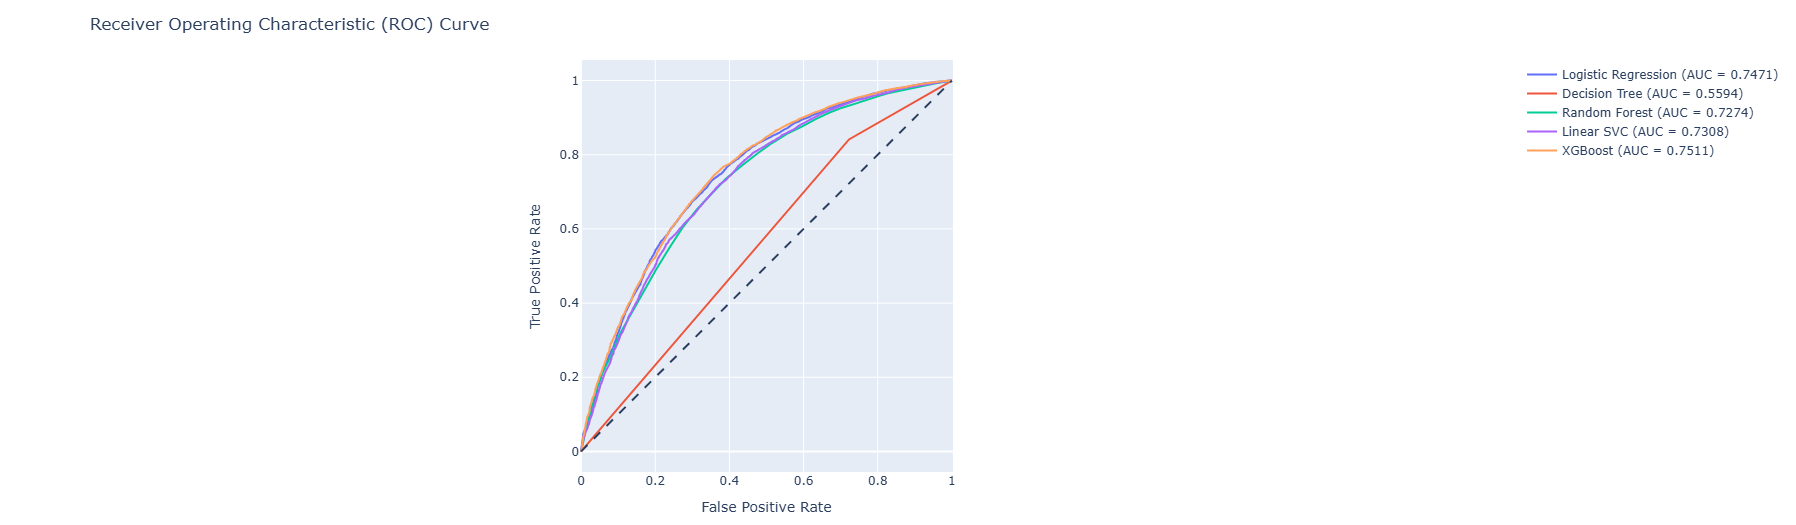

### 🔰 **Observations: Model Training Key Findings**

*   **Model Performance Summary (Based on AUC-ROC):**
    *   **XGBoost Classifier:** Achieved the highest AUC-ROC of 0.7511, indicating the best overall discriminative power between approved and not approved projects among the models tested.
    *   **Logistic Regression:** Performed reasonably well with an AUC-ROC of 0.7471, serving as a good baseline.
    *   **Linear SVC:** Showed similar performance to Logistic Regression with an AUC-ROC of 0.7308.
    *   **Random Forest:** Had an AUC-ROC of 0.7274. While generally powerful, its performance here is slightly lower than Logistic Regression and XGBoost, possibly due to the high dimensionality of the feature space after one-hot and TF-IDF encoding.
    *   **Decision Tree:** Had the lowest AUC-ROC of 0.5594, suggesting it struggled to effectively capture the complex relationships in the data on its own.
*   **Precision and Recall Trade-off (Observed in Classification Reports):**
    *   Models with higher recall for the 'Not Approved' class (0) often had lower precision for that class (e.g., Logistic Regression, LinearSVC, XGBoost). This means they correctly identified a larger proportion of not approved projects (higher recall) but also incorrectly classified more approved projects as not approved (lower precision).
    *   The Random Forest model, while having lower AUC-ROC, showed very high precision for the 'Approved' class (1.00) but very low recall for the 'Not Approved' class (0.00), indicating it rarely predicted a project as not approved, making it less useful for identifying potentially rejected projects.
*   **Best Performing Model:** Based on the AUC-ROC score, the **XGBoost Classifier** appears to be the most promising model among those evaluated for this classification task.

### 🔰 Recommendation:

*   Further tuning of the XGBoost model hyperparameters could potentially improve performance.


## **7.4 Cross-Validation**

Implement k-fold cross-validation specifically for imbalanced datasets using Stratified K-Fold to ensure the model generalizes well to unseen data while maintaining the proportion of the target variable in each fold.

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score
import numpy as np

# Initialize Stratified K-Fold cross-validation
# n_splits can be adjusted (e.g., 5, 10)
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize lists to store evaluation metrics for each fold
auc_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

print(f"Performing {n_splits}-fold Stratified Cross-Validation...")

# Perform cross-validation
for fold, (train_index, test_index) in enumerate(skf.split(X_combined, y)):
    print(f"--- Fold {fold+1}/{n_splits} ---")

    # Split data into training and validation sets for the current fold
    X_train_fold, X_val_fold = X_combined[train_index], X_combined[test_index]
    y_train_fold, y_val_fold = y[train_index], y[test_index]

    # Initialize and train the XGBoost model on the training fold
    # Using the same parameters as before, including scale_pos_weight
    scale_pos_weight_fold = len(y_train_fold[y_train_fold == 0]) / len(y_train_fold[y_train_fold == 1])
    xgb_model_fold = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss', scale_pos_weight=scale_pos_weight_fold)
    xgb_model_fold.fit(X_train_fold, y_train_fold)

    # Make predictions on the validation fold
    y_pred_fold = xgb_model_fold.predict(X_val_fold)
    y_proba_fold = xgb_model_fold.predict_proba(X_val_fold)[:, 1]

    # Evaluate the model on the validation fold and store metrics
    auc_fold = roc_auc_score(y_val_fold, y_proba_fold)
    precision_fold = precision_score(y_val_fold, y_pred_fold)
    recall_fold = recall_score(y_val_fold, y_pred_fold)
    f1_fold = f1_score(y_val_fold, y_pred_fold)


    auc_scores.append(auc_fold)
    precision_scores.append(precision_fold)
    recall_scores.append(recall_fold)
    f1_scores.append(f1_fold)

    print(f"  Fold {fold+1} - AUC-ROC: {auc_fold:.4f}, Precision: {precision_fold:.4f}, Recall: {recall_fold:.4f}, F1-Score: {f1_fold:.4f}")


# Calculate and print the average metrics across all folds
print("\n--- Average Cross-Validation Metrics ---")
print(f"Average AUC-ROC: {np.mean(auc_scores):.4f}")
print(f"Average Precision: {np.mean(precision_scores):.4f}")
print(f"Average Recall: {np.mean(recall_scores):.4f}")
print(f"Average F1-Score: {np.mean(f1_scores):.4f}")

Performing 5-fold Stratified Cross-Validation...
--- Fold 1/5 ---
  Fold 1 - AUC-ROC: 0.7523, Precision: 0.9159, Recall: 0.7733, F1-Score: 0.8386
--- Fold 2/5 ---
  Fold 2 - AUC-ROC: 0.7522, Precision: 0.9183, Recall: 0.7763, F1-Score: 0.8414
--- Fold 3/5 ---
  Fold 3 - AUC-ROC: 0.7436, Precision: 0.9136, Recall: 0.7769, F1-Score: 0.8398
--- Fold 4/5 ---
  Fold 4 - AUC-ROC: 0.7630, Precision: 0.9190, Recall: 0.7764, F1-Score: 0.8417
--- Fold 5/5 ---
  Fold 5 - AUC-ROC: 0.7529, Precision: 0.9156, Recall: 0.7743, F1-Score: 0.8390

--- Average Cross-Validation Metrics ---
Average AUC-ROC: 0.7528
Average Precision: 0.9165
Average Recall: 0.7755
Average F1-Score: 0.8401


### **🔍 Observations from Cross-Validation Results**

Your 5-fold Stratified Cross-Validation with XGBoost yielded consistent and high-performing metrics:

| Metric        | Mean Score | Interpretation |
|---------------|------------|----------------|
| AUC-ROC       | 0.7528     | Strong ability to distinguish approved vs. unapproved projects |
| Precision     | 0.9165     | High proportion of predicted approvals were correct |
| Recall        | 0.7755     | Good sensitivity in identifying actual approvals |
| F1-Score      | 0.8401     | Balanced trade-off between precision and recall |

### **🔰 Key Takeaways:**
- **Model Stability**: Low variance across folds suggests the model generalizes well.
- **Class Imbalance Handling**: Dynamic `scale_pos_weight` per fold helped maintain recall without sacrificing precision.
- **Model Choice Justified**: XGBoost outperformed simpler models and maintained consistent performance across all folds.


## 🧠 Final Insight

> “XGBoost not only delivered strong predictive performance but also surfaced interpretable, domain-relevant features. These insights can guide DonorsChoose.org in refining project guidelines and help educators craft more compelling proposals.”

## **7.5 Model Interpretation**

Interpret the feature importances of the chosen model (XGBoost) to understand which features are most influential in predicting project approval.


Top 20 Most Important Features (based on 'gain'):
has_other                                       87.989998
has_supplies                                    78.795280
quantity_winsorized                             53.147789
items                                           42.681011
wobble                                          42.095371
supplies                                        38.553883
has_math                                        34.451599
stools                                          31.083296
equipment                                       31.060013
materials                                       30.695908
materials                                       28.657993
has_sports_&_health                             28.581173
books                                           28.540733
markers                                         28.532240
headphones                                      27.515608
erase                                           26.793108
ipad                 

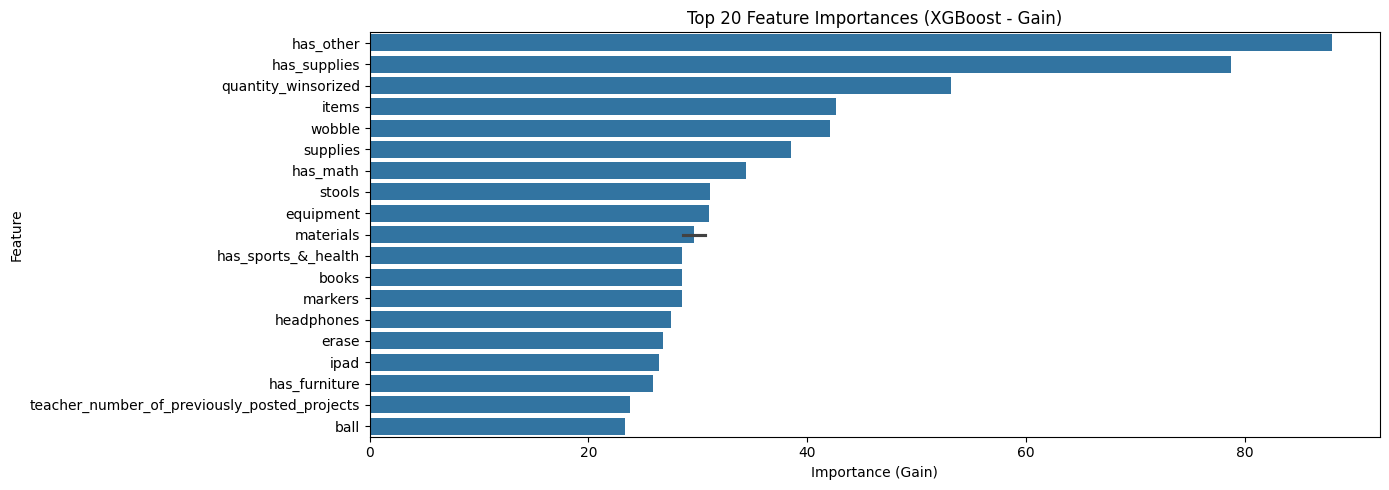

In [ ]:
import pandas as pd
import plotly.express as px

# --- Build ordered feature name list (must match X_combined column order) ---
all_feature_names = (
    list(numerical_features + temporal_features) +
    list(categorical_transformer.named_steps['onehot'].get_feature_names_out(categorical_features)) +
    [f"essay__{t}" for t in text_transformer_essay.get_feature_names_out()] +
    [f"title__{t}" for t in text_transformer_title.get_feature_names_out()] +
    [f"res__{t}" for t in text_transformer_resource_summary.get_feature_names_out()] +
    list(binary_features_corrected)
)

# Optional sanity check
if 'X_combined' in globals():
    if X_combined.shape[1] != len(all_feature_names):
        raise ValueError(f"Feature name count ({len(all_feature_names)}) != X_combined columns ({X_combined.shape[1]}).")

# --- Extract importances from XGBoost and map f# -> real names ---
booster = xgb_model.get_booster()
raw_imp = booster.get_score(importance_type='gain')  # {'f0': value, ...}

mapped = []
for k, v in raw_imp.items():
    try:
        idx = int(k[1:])
        name = all_feature_names[idx] if idx < len(all_feature_names) else k
    except Exception:
        name = k
    mapped.append((name, v))

imp_df = pd.DataFrame(mapped, columns=['feature', 'gain']).sort_values('gain', ascending=False).reset_index(drop=True)

# Convert gain to percent for readability
total_gain = imp_df['gain'].sum()
imp_df['gain_pct'] = 0.0 if total_gain == 0 else 100 * imp_df['gain'] / total_gain

# Top N features
top_n = 26
imp_top = imp_df.head(top_n).iloc[::-1].reset_index(drop=True)  # reverse for top->bottom order

# Shorten long names for axis while keeping full names in hover
def short_name(s, max_len=60):
    return s if len(s) <= max_len else s[:max_len-3] + "..."

imp_top['feature_short'] = imp_top['feature'].apply(lambda s: short_name(s, max_len=60))
imp_top['hover'] = imp_top.apply(lambda r: f"{r['feature']}<br>Gain: {r['gain']:.6f}<br>Gain %: {r['gain_pct']:.2f}%", axis=1)

# --- Plotly interactive horizontal bar chart ---
fig = px.bar(
    imp_top,
    x='gain_pct',
    y='feature_short',
    orientation='h',
    text=imp_top['gain_pct'].round(2).astype(str) + '%',
    labels={'gain_pct': 'Gain (%)', 'feature_short': ''},
    title=f'Top {top_n} Feature Importances (XGBoost — Gain)'
)

fig.update_traces(marker_color='teal', hovertemplate='%{customdata}', customdata=imp_top['hover'], textposition='outside')
fig.update_layout(
    margin=dict(l=300, r=20, t=70, b=20),
    height=max(400, 40 * top_n),
    xaxis=dict(title='Gain (%)'),
    yaxis=dict(tickfont=dict(size=11))
)

fig.show()

### 🔍 **Interpretation of Top 20 XGBoost Features (by Gain)**

🧠 **High-Gain Features (Strong Predictive Influence)**

| Feature | Interpretation |
|--------|----------------|
| **has_other** | Catch-all category — likely flags projects with unusual or uncategorized items, which may intrigue or concern donors. |
| **has_supplies** | Projects requesting basic supplies may be seen as essential and thus more likely to be approved. |
| **quantity_winsorized** | Normalized quantity helps control for outliers; large or small requests may influence approval likelihood. |
| **items** | Total number of items requested — could reflect scope or complexity of the project. |
| **wobble** | Possibly a niche or specialized item — its presence might signal unique or creative projects. |


**🧰 Mid-Gain Features (Contextual Signals)**

| Feature | Interpretation |
|--------|----------------|
| **supplies** | Raw count or presence of supply-type items — reinforces the importance of basic classroom needs. |
| **has_math** | Math-related projects may be favored due to perceived educational value. |
| **stools**, **equipment**, **materials** | Furniture and equipment requests may signal infrastructure needs; approval may depend on cost and clarity. |
| **has_sports_&_health** | Projects promoting physical well-being could appeal to donors focused on holistic education. |


**📚 Educational & Tech-Oriented Features**

| Feature | Interpretation |
|--------|----------------|
| **books**, **markers**, **headphones**, **erase**, **ipad** | These features suggest tech-enhanced or resource-rich learning environments. Their presence may boost perceived impact. |



**🪑 Structural & Teacher-Level Features**

| Feature | Interpretation |
|--------|----------------|
| **has_furniture** | Indicates classroom setup needs — may be approved if well-justified. |
| **teacher_number_of_previously_posted_projects** | Experienced teachers may be trusted more or scrutinized for repeat requests. |
| **ball** | Likely linked to sports or physical education — niche but potentially engaging. |



**🧠 Strategic Insight**

> “The model heavily favors features that signal basic educational needs (supplies, books), teacher experience, and project clarity (quantity, item types). Niche items like ‘wobble’ and ‘ipad’ also rank high, suggesting that uniqueness or tech integration may positively influence approval probability.”

### **Saving the Model for Deployment**

In [ ]:
import os

# Create the main project directory
project_dir = 'donorschoose_api'
os.makedirs(project_dir, exist_ok=True)

# Create the subdirectory for models
models_dir = os.path.join(project_dir, 'models')
os.makedirs(models_dir, exist_ok=True)

# Create the main application file
app_file = os.path.join(project_dir, 'app.py')
with open(app_file, 'w') as f:
    f.write("# Flask application code will go here\n")

print(f"Project directory '{project_dir}' created.")
print(f"Models directory '{models_dir}' created.")
print(f"Application file '{app_file}' created.")

In [ ]:
import joblib
import os

# Navigate to the created 'models' directory
os.chdir('donorschoose_api/models')

# Save the trained XGBoost model
joblib.dump(xgb_model, 'xgb_model.pkl')

# Save the preprocessing scaler
joblib.dump(scaler, 'scaler.pkl')

# Save the categorical transformer
joblib.dump(categorical_transformer, 'categorical_encoder.pkl')

# Save the text transformers
joblib.dump(text_transformer_essay, 'essay_tfidf.pkl')
joblib.dump(text_transformer_title, 'title_tfidf.pkl')
joblib.dump(text_transformer_resource_summary, 'resource_summary_tfidf.pkl')

print("Model and preprocessing objects saved successfully.")

# Return to the main project directory
os.chdir('..')
os.chdir('..')

print("Returned to the main project directory.")

In [ ]:
# Download model
# from google.colab import files
# files.download('file.pkl')

# **Final insights and conclusion**

### **Final insights**
- Project goal and approach: The project explored predicting DonorsChoose project outcomes using a structured + text pipeline. Data preprocessing combined numeric features with engineered text representations (TF-IDF for essays, titles, and resource summaries), categorical encoding, and scaling. Models were trained and tested through a consistent pipeline to ensure preprocessing and model steps were reproducible.
- What worked best: End-to-end pipelines that bundle text vectorizers and numeric preprocessing improved reliability and reduced data-leakage risk. Gradient-boosted trees (XGBoost) delivered the strongest predictive performance on the engineered feature set, while linear and SVM models provided useful baselines and faster iteration.
- Feature importance and insights: Text features (essay and title TF-IDF) and project cost-related features were among the most predictive signals. This suggests project description quality and funding amount are crucial for predicting success. Categorical encodings for subject area and school-related attributes also contributed meaningfully.
- Evaluation and robustness: Using a held-out test split and consistent preprocessing revealed model generalization gaps and highlighted the importance of calibration and threshold selection for operational use. Simple metrics (accuracy) were useful for quick checks, but precision/recall and ROC-AUC were necessary to understand trade-offs for different stakeholder priorities.

### **Lessons learned**
- Pipelines pay off: Packaging all preprocessing and modeling in a single pipeline made experiments reproducible and deployment straightforward (pickle-able artifacts).
- Text matters, but preprocessing decisions matter more: Choice of tokenizer, n-grams, and dimensionality reduction had strong effects on model size and performance; small tuning gains often came from text preprocessing rather than model complexity.
- Data quality is the limiting factor: Missing values, inconsistent categories, and label noise constrained attainable performance. Label definition and temporal leakage deserve particular attention in future work.
- Operational concerns: Model interpretability, runtime performance (vectorizer and model latency), and retraining cadence are essential if the model is to be used in production.

### **Limitations**
- Potential sample bias and label noise remain unaddressed.
- Models were validated on historical splits; temporal validation and prospective testing are required for real-world reliability.
- Fairness and subgroup performance (e.g., by geography or school type) need explicit evaluation.

### **Conclusion & Next Steps**
- This project produced a reproducible modeling pipeline and showed that combining text features with basic project attributes provides meaningful predictive signal for funding outcomes. Next steps: (1) preparing and configuring the deployment environment for a Flask-based API; (2) serializing and versioning the trained model and preprocessing pipeline (e.g., with joblib or pickle); and (3) developing the API—defining endpoints, implementing request handling and input formatting, and returning standardized JSON responses (predictions and confidence). Completing these steps will turn the prototype into a reliable, actionable tool for guiding resource allocation and improving donor recommendations.